
<meta name="viewport" content="width=device-width, initial-scale=1">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.2/css/all.min.css">
<link rel="stylesheet" href="../static/css/styles.css">


        
<!-- <body> -->
<!-- Navigation-->
<nav class="navbar navbar-expand-lg navbar-light fixed-top" id="mainNav">
    <div class="container px-4 px-lg-5">
        <a class="navbar-brand" href="../index.html">Home</a>
        <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarResponsive" aria-controls="navbarResponsive" aria-expanded="false" aria-label="Toggle navigation">
            Menu
            <i class="fas fa-bars"></i>
        </button>
        <div class="collapse navbar-collapse" id="navbarResponsive">
            <ul class="navbar-nav ms-auto py-4 py-lg-0">
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="../index.html">Executive Summary</a></li>
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="eda.html">Exploratory Data Analysis</a></li>
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="models.html">Model Construction & Validation</a></li>
                <!-- <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="initial_work.html">Reference: Model Development</a></li> -->
            </ul>
        </div>
    </div>
</nav>



<link rel="stylesheet" href="../static/css/styles.css">

<h2 id="title" style="text-align: center; width: 80%;">Reference: Model Development</h2>

> # Introductory Note:
>
> Here is where I worked out all of the kinks, ran all the experiments, and generally made a mess before landing on the final models. The structure and some of the text are a mashup of my own work and materials from the capstone project of the <a href="https://www.coursera.org/learn/google-advanced-data-analytics-capstone" target="_blank">Google Advanced Data Analytics Professional Certificate</a>, so you’ll see a bit of both voices throughout.
>
> A few things worth noting:
>
> **No editor has cleaned this up.** Comments are asynchronous—meaning they might be from any stage of model development. One glaring example of this is in baseline model evaluation, written back before I added class balancing as an option to hyperparameter tuning, when logistic regression was performing abysmally. Mistakes were made. **Don't trust the comments.**
>
> **Do trust the code.** This is the actual code that was used to select the final prediction models.
>
> I *think* all my commentary is in code blocks like this one, but no promises.
>
> Polished summaries of model development are in both [Model Construction & Validation](./models.html) and the [Executive Summary](../index.html)

# Table of Contents

- [Pace: Plan](#pace-plan)
  - [Imports](#imports)
  - [Data Exploration (Initial EDA and data cleaning)](#data-exploration-initial-eda-and-data-cleaning)
- [pAce: Analyze Stage](#pace-analyze-stage)
  - [Data Visualization and EDA](#data-visualization-and-eda)
- [paCe: Construct Stage](#pace-construct-stage)
  - [Model Building](#model-building)
  - [Baseline Models](#baseline-models)
  - [Feature Engineering (Round One)](#feature-engineering-round-one)
  - [Feature Engineering (Round Two)](#feature-engineering-round-two)
  - [Model Evaluation Results](#model-evaluation-results)
- [pacE: Execute Stage](#pace-execute-stage)
  - [Results and Evaluation](#results-and-evaluation)

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


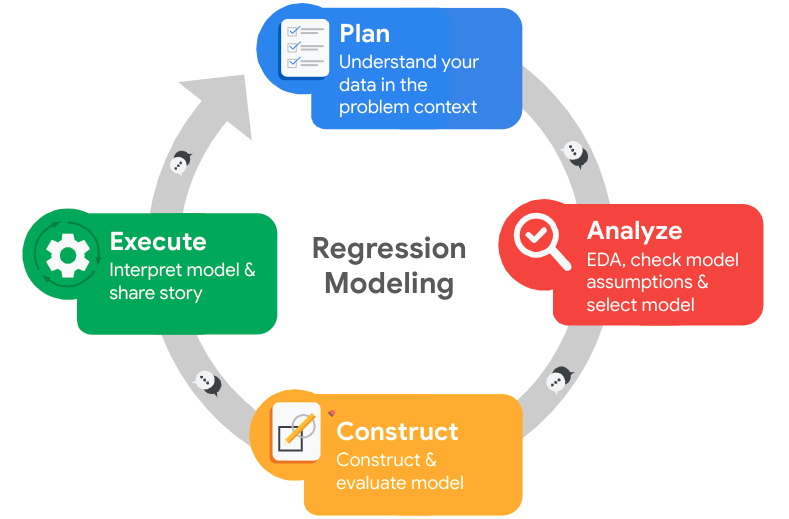

<a id="pace-plan"></a>

# **Pace: Plan**
[Back to top](#)

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

> ### Feature Engineering Data Dictionary
> 
>
> The following table describes the engineered features created for model development. These features are derived from the original dataset using binning, interaction terms, and logical flags to capture important patterns identified during exploratory data analysis.
>
> Variable  |Description |
> -----|-----|
> **Bins** | |
> satisfaction_bin_low | Binary indicator: satisfaction_level is low (≤ 0.4) |
> satisfaction_bin_medium | Binary indicator: satisfaction_level is medium (> 0.4 and ≤ 0.7) |
> satisfaction_bin_high | Binary indicator: satisfaction_level is high (> 0.7) |
> hours_bin_low | Binary indicator: average_monthly_hours is low (≤ 160) |
> hours_bin_medium | Binary indicator: average_monthly_hours is medium (> 160 and ≤ 240) |
> hours_bin_high | Binary indicator: average_monthly_hours is high (> 240) |
> projects_bin_low | Binary indicator: number_project is low (≤ 2) |
> projects_bin_medium | Binary indicator: number_project is medium (> 2 and ≤ 5) |
> projects_bin_high | Binary indicator: number_project is high (> 5) |
> tenure_bin_short | Binary indicator: tenure is short (≤ 3 years) |
> tenure_bin_mid | Binary indicator: tenure is mid (> 3 and ≤ 5 years) |
> tenure_bin_long | Binary indicator: tenure is long (> 5 years) |
> **Interactions** | |
> satisfaction_x_projects | Interaction: satisfaction_level × number_project |
> satisfaction_x_hours | Interaction: satisfaction_level × average_monthly_hours |
> evaluation_x_satisfaction | Interaction: last_evaluation × satisfaction_level |
> hours_per_project | Ratio: average_monthly_hours divided by number_project |
> **Flags** | |
> burnout | Flag: True if (number_project ≥ 6 or average_monthly_hours ≥ 240) and satisfaction_level ≤ 0.3 |
> disengaged | Flag: True if (number_project ≤ 2 and average_monthly_hours < 160 and satisfaction_level ≤ 0.5) |
> no_promo_4yr | Flag: True if promotion_last_5years == 0 and tenure ≥ 4 |
> 
> **Note:**  
> Binned features are one-hot encoded as separate columns (e.g., satisfaction_bin_low, satisfaction_bin_medium, satisfaction_bin_high). Only the relevant dummy variables (excluding the first category for each bin) are included in the final dataset, depending on the encoding strategy.

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




> **Stakeholders:**  
> The primary stakeholder is the Human Resources (HR) department, as they will use the results to inform retention strategies. Secondary stakeholders include C-suite executives who oversee company direction, managers implementing day-to-day retention efforts, employees (whose experiences and outcomes are directly affected), and, indirectly, customers—since employee satisfaction can impact customer satisfaction.
>
> **Project Goal:**  
> The objective is to build a predictive model to identify which employees are likely to leave the company. The model should be interpretable so HR can design targeted interventions to improve retention, rather than simply flagging at-risk employees without actionable insights.
>
> **Initial Data Observations:**  
> - The workforce displays moderate satisfaction and generally high performance reviews.
> - Typical tenure is 3–4 years, with most employees (98%) not promoted recently.
> - Workplace accidents are relatively rare (14%).
> - Most employees are in lower salary bands and concentrated in sales, technical, and support roles.
> - About 24% of employees have left the company.
> - No extreme outliers, though a few employees have unusually long tenures or high monthly hours.
>
> **Resources Used:**  
> - [Data dictionary](./data_dictionary_salifort.md)  
> - [pandas documentation](https://pandas.pydata.org/docs/)  
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)  
> - [seaborn documentation](https://seaborn.pydata.org/)  
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)  
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
>
> **Ethical Considerations:**  
> - Ensure employee data privacy and confidentiality throughout the analysis.
> - Avoid introducing or perpetuating bias in model predictions (e.g., not unfairly targeting specific groups).
> - Maintain transparency in how predictions are generated and how they will be used in HR decision-making.

<a id="imports"></a>

## Imports
[Back to top](#)

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import time
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from IPython.display import Image, display, HTML

from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_predict,
    GridSearchCV,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    fbeta_score,
)

In [2]:
# get initial time, for measuring performance at the end
nb_start_time = time.time()

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("../resources/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<a id="data-exploration-initial-eda-and-data-cleaning"></a>

## Data Exploration (Initial EDA and data cleaning)
[Back to top](#)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Department value counts and percent
dept_counts = df0.Department.value_counts()
dept_percent = df0.Department.value_counts(normalize=True) * 100
dept_summary = pd.DataFrame({"Count": dept_counts, "Percent": dept_percent.round(2)})
print("Department value counts and percent:\n", dept_summary)

# Salary value counts and percent
salary_counts = df0.salary.value_counts()
salary_percent = df0.salary.value_counts(normalize=True) * 100
salary_summary = pd.DataFrame(
    {"Count": salary_counts, "Percent": salary_percent.round(2)}
)
print("\nSalary value counts and percent:\n", salary_summary)

Department value counts and percent:
              Count  Percent
Department                 
sales         4140    27.60
technical     2720    18.13
support       2229    14.86
IT            1227     8.18
product_mng    902     6.01
marketing      858     5.72
RandD          787     5.25
accounting     767     5.11
hr             739     4.93
management     630     4.20

Salary value counts and percent:
         Count  Percent
salary                
low      7316    48.78
medium   6446    42.98
high     1237     8.25


In [6]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

> #### **Observations from descriptive statistics**
>
> - **satisfaction_level:** Employee job satisfaction scores range from 0.09 to 1.0, with an average of about 0.61. The distribution is fairly wide (std ≈ 0.25), suggesting a mix of satisfied and dissatisfied employees.
> - **last_evaluation:** Performance review scores are generally high (mean ≈ 0.72), ranging from 0.36 to 1.0, with most employees scoring above 0.56.
> - **number_project:** Employees typically work on 2 to 7 projects, with a median of 4 projects.
> - **average_monthly_hours:** The average employee works about 201 hours per month, with a range from 96 to 310 hours, indicating some employees work significantly more than others.
> - **time_spend_company:** Most employees have been with the company for 2 to 10 years, with a median of 3 years. There are a few long-tenure employees (up to 10 years), but most are around 3–4 years.
> - **Work_accident:** About 14% of employees have experienced a workplace accident.
> - **left:** About 24% of employees have left the company (mean ≈ 0.24), so roughly one in four employees in the dataset is a leaver.
> - **promotion_last_5years:** Very few employees (about 2%) have been promoted in the last five years.
> - **department:** The largest departments are sales, technical, and support, which together account for over half of the workforce. Other departments are notably smaller.
> - **salary:** Most employees are in the low (49%) or medium (43%) salary bands, with only a small proportion (8%) in the high salary band.
>
> **Summary:**  
> The data shows a workforce with moderate satisfaction, generally high performance reviews, and a typical tenure of 3–4 years. Most employees have not been promoted recently, and workplace accidents are relatively uncommon. Most employees are in lower salary bands and concentrated in sales, technical, and support roles. There is a notable proportion of employees who have left. There are no extreme outliers, but a few employees have unusually long tenures or high monthly hours.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0.rename(
    columns={
        "Department": "department",
        "Work_accident": "work_accident",
        "average_montly_hours": "average_monthly_hours",
        "time_spend_company": "tenure",
    },
    inplace=True,
)


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

> There are 3,008 duplicate rows in the dataset. Since it is highly improbable for two employees to have identical responses across all columns, these duplicate entries should be removed from the analysis.

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB
None


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

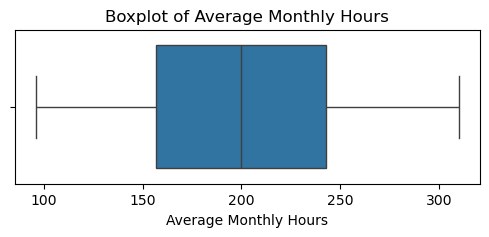

In [13]:
# Boxplot of `average_monthly_hours` to visualize distribution and detect outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["average_monthly_hours"])
plt.title("Boxplot of Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.show()

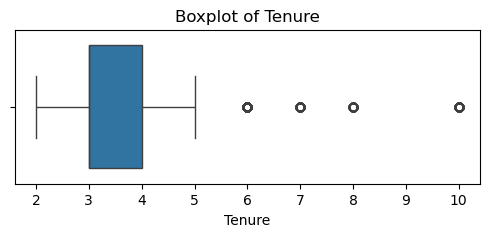

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["tenure"])
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure")
plt.show()

In [15]:
# Determine the number of rows containing outliers
q1 = df.tenure.quantile(0.25)
q3 = df.tenure.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# Filter the dataframe to find outliers
outliers = df[df.tenure > upper_bound]

# Display the number of outliers
print(f"Number of tenure outliers: {len(outliers)}")
print(f"Outliers percentage of total: {len(outliers) / len(df) * 100:.2f}%")

Number of tenure outliers: 824
Outliers percentage of total: 6.87%


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

<a id="pace-analyze-stage"></a>

# pAce: Analyze Stage
[Back to top](#)

- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




>
> **Two Distinct Populations of Leavers:**  
> There are two major groups of employees who left the company:
> - **Underworked and Dissatisfied:** These employees had low satisfaction and worked fewer hours and projects. They may have been fired. Alternately, they may have given notice or had already mentally checked out and were assigned less work.
> - **Overworked and Miserable:** These employees had low satisfaction but were assigned a high number of projects (6–7) and worked 250–300 hours per month. Notably, 100% of employees with 7 projects left.  
>
> Employees working on 3–4 projects generally stayed. Most groups worked more than a typical 40-hour workweek. 
>
> Attrition is highest at the 4–5 year mark, with a sharp drop-off in departures after 5 years. This suggests a critical window for retention efforts. Employees who make it past 5 years are much more likely to stay.
>
> Both leavers and stayers tend to have similar evaluation scores, though some employees with high evaluations still leave—often those who are overworked. This suggests that strong performance alone does not guarantee retention if other factors (like satisfaction or workload) are problematic.
> 
> **Relationships Between Variables:**
> - **Satisfaction level** is the strongest predictor of attrition. Employees who left had much lower satisfaction than those who stayed.
> - **Number of projects** and **average monthly hours** show a non-linear relationship: both underworked and overworked employees are more likely to leave, while those with a moderate workload tend to stay.
> - **Employee evaluation** (last performance review) has a weaker relationship with attrition compared to satisfaction or workload. 
> - **Tenure** shows a moderate relationship with attrition: employees are most likely to leave at the 4–5 year mark, with departures dropping sharply after 5 years.
> - **Promotion in the last 5 years** is rare, and lack of promotion is associated with higher attrition.
> - **Department** and **salary** have only minor effects on attrition compared to satisfaction and workload.
> - **Work accidents** are slightly associated with lower attrition, possibly due to increased support after an incident.
> 
> **Distributions in the Data:**
> - Most variables (satisfaction, evaluation, monthly hours) are broadly distributed, with some skewness.
> - **Tenure** is concentrated around 3–4 years, with few employees beyond 5 years.
> - **Number of projects** is typically 3–4, but a small group has 6–7 projects (most of whom left).
> - **Salary** is heavily skewed toward low and medium bands.
> - There are no extreme outliers, but a few employees have unusually high tenure or monthly hours.
> 
> **Data Transformations:**
> - **Renamed columns** to standardized, snake_case format for consistency and easier coding.
> - **Removed duplicate rows** (about 3,000) to ensure each employee is only represented once.
> - **Checked for and confirmed absence of missing values** to avoid bias or errors in analysis.
> - **Explored outliers** but did not remove them at this stage, as their impact will be considered during modeling.
> 
> **Purposes of EDA Before Modeling:**
> - Understand the structure, quality, and distribution of the data.
> - Identify key variables and relationships that may influence attrition.
> - Detect and address data quality issues (duplicates, missing values, outliers).
> - Inform feature selection and engineering for modeling.
> - Ensure assumptions for modeling (e.g., independence, lack of multicollinearity) are reasonable.
> 
> **Resources Used:**
> - [pandas documentation](https://pandas.pydata.org/docs/)
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)
> - [seaborn documentation](https://seaborn.pydata.org/)
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
> 
> **Ethical Considerations:**
> - Ensure employee data privacy and confidentiality.
> - Avoid introducing or perpetuating bias in analysis or modeling.
> - Be transparent about how findings and predictions will be used.
> - Consider the impact of recommendations on employee well-being and fairness.
> 
> **Note:**  
> This data is clearly synthetic—it's too clean, and the clusters in the charts are much neater than what you’d see in real-world HR data.  
>

<a id="data-visualization-and-eda"></a>

## Data Visualization and EDA
[Back to top](#)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
# Get percentages of people who left vs. stayed
left_counts = df.left.value_counts()
left_percent = df.left.value_counts(normalize=True) * 100

left_summary = pd.DataFrame({"Count": left_counts, "Percent": left_percent.round(2)})

left_summary.index = left_summary.index.map({0: "Stayed", 1: "Left"})
left_summary

Count  Percent
left                  
Stayed  10000     83.4
Left     1991     16.6

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

> I'll start with everything at once, then show individual plots

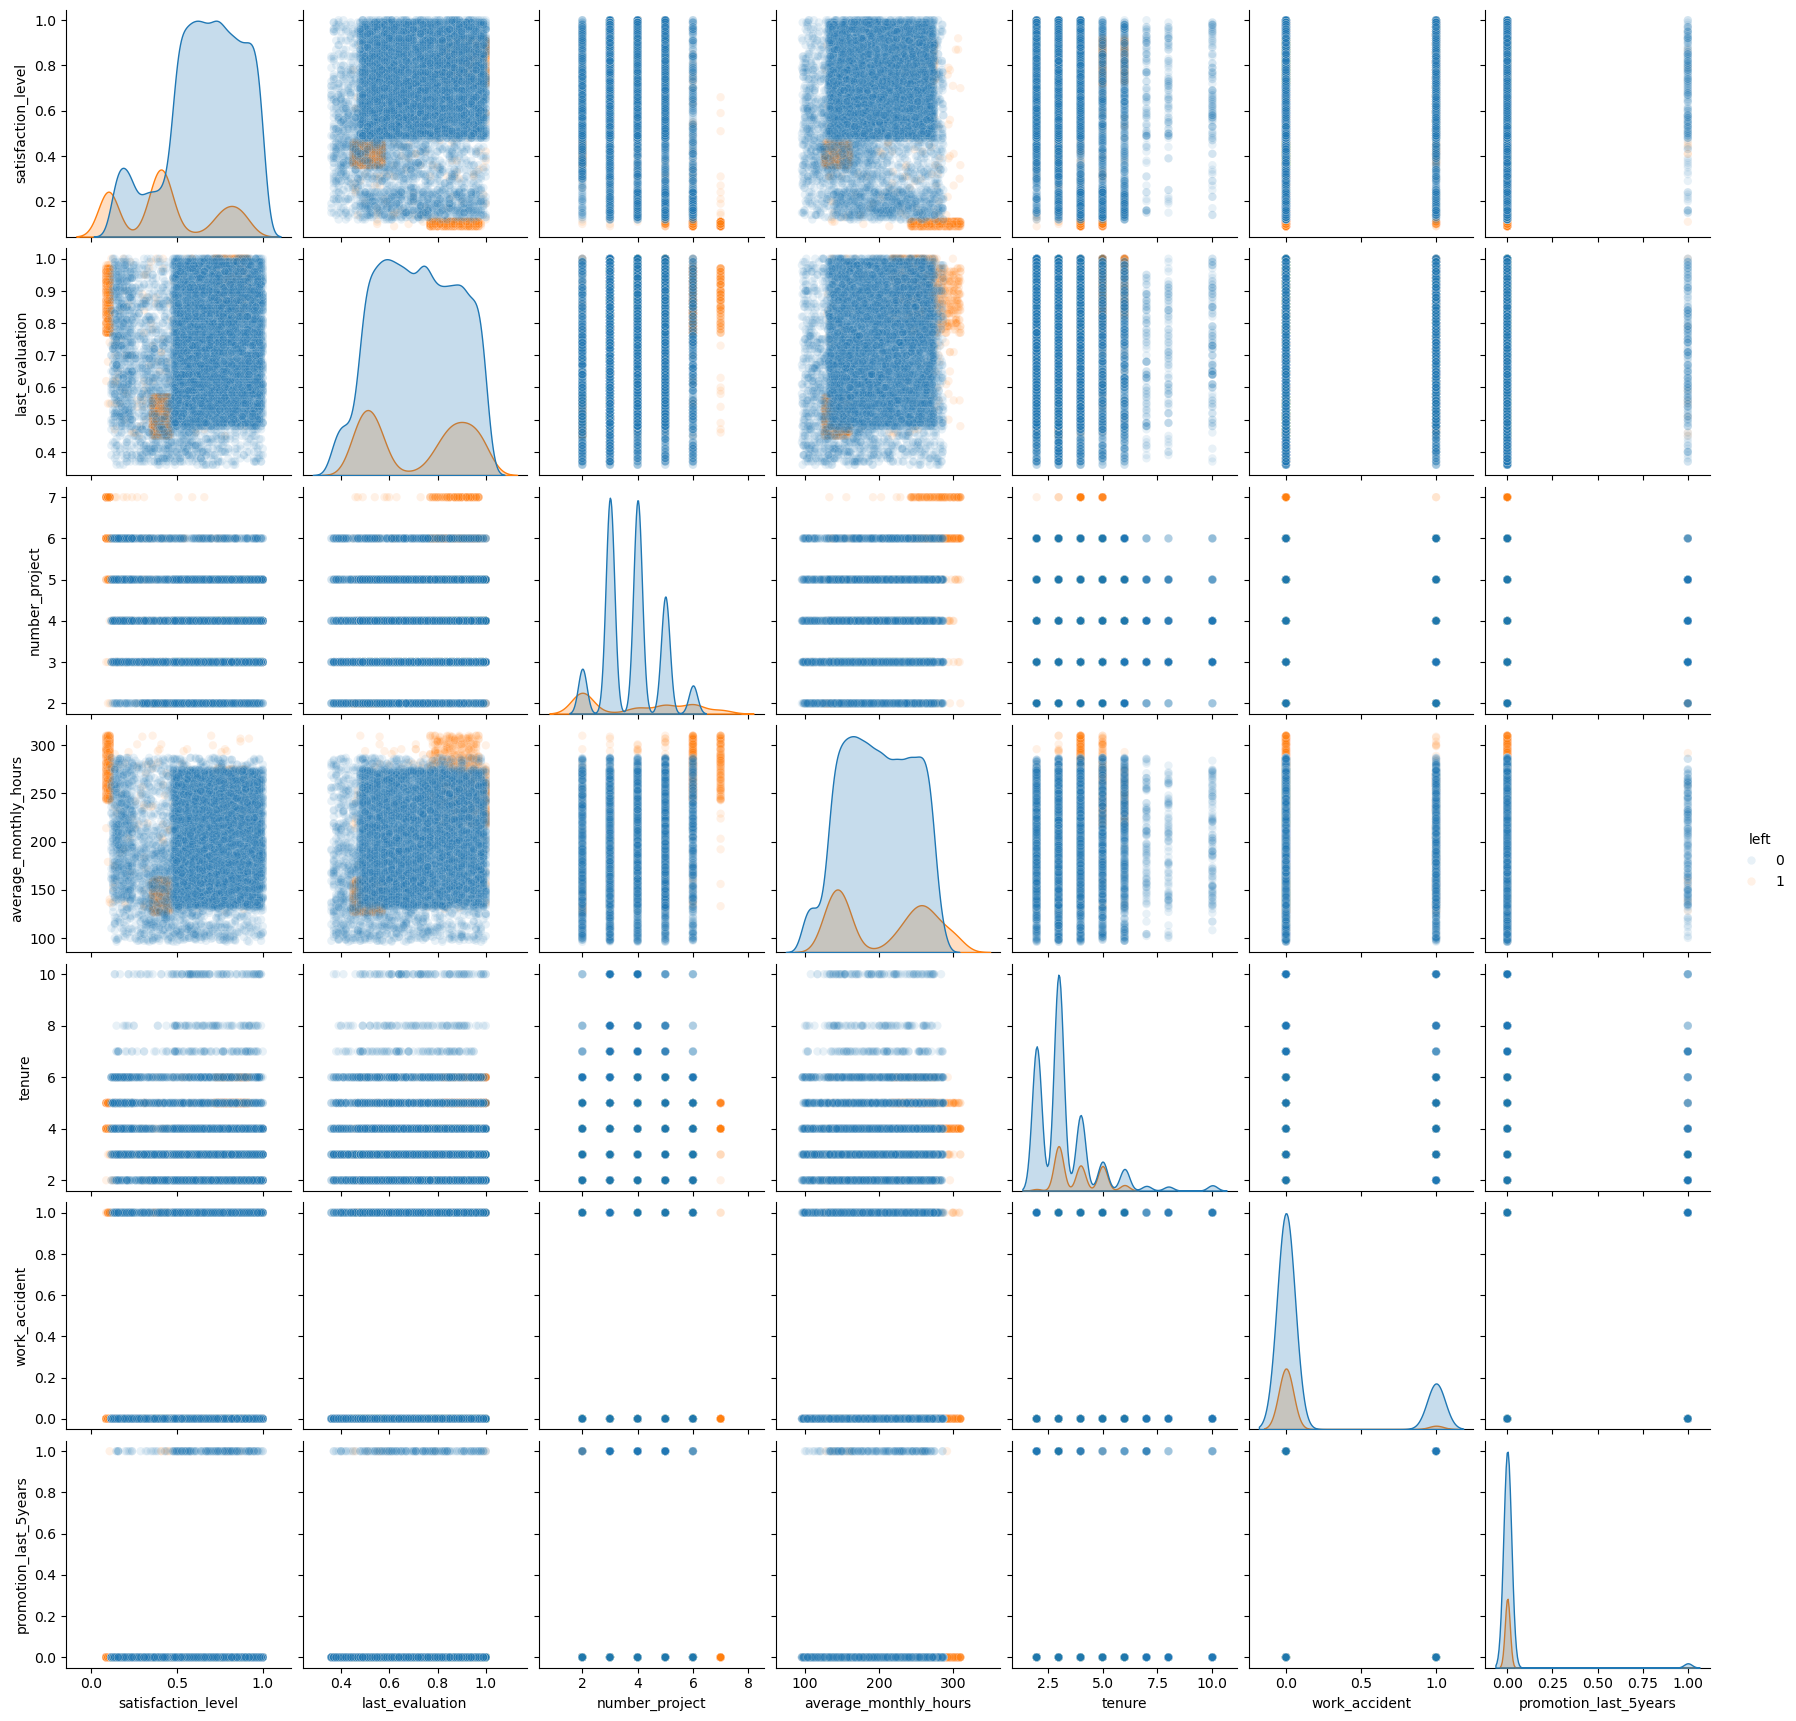

In [17]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue="left", diag_kind="kde", plot_kws={"alpha": 0.1})
plt.show()

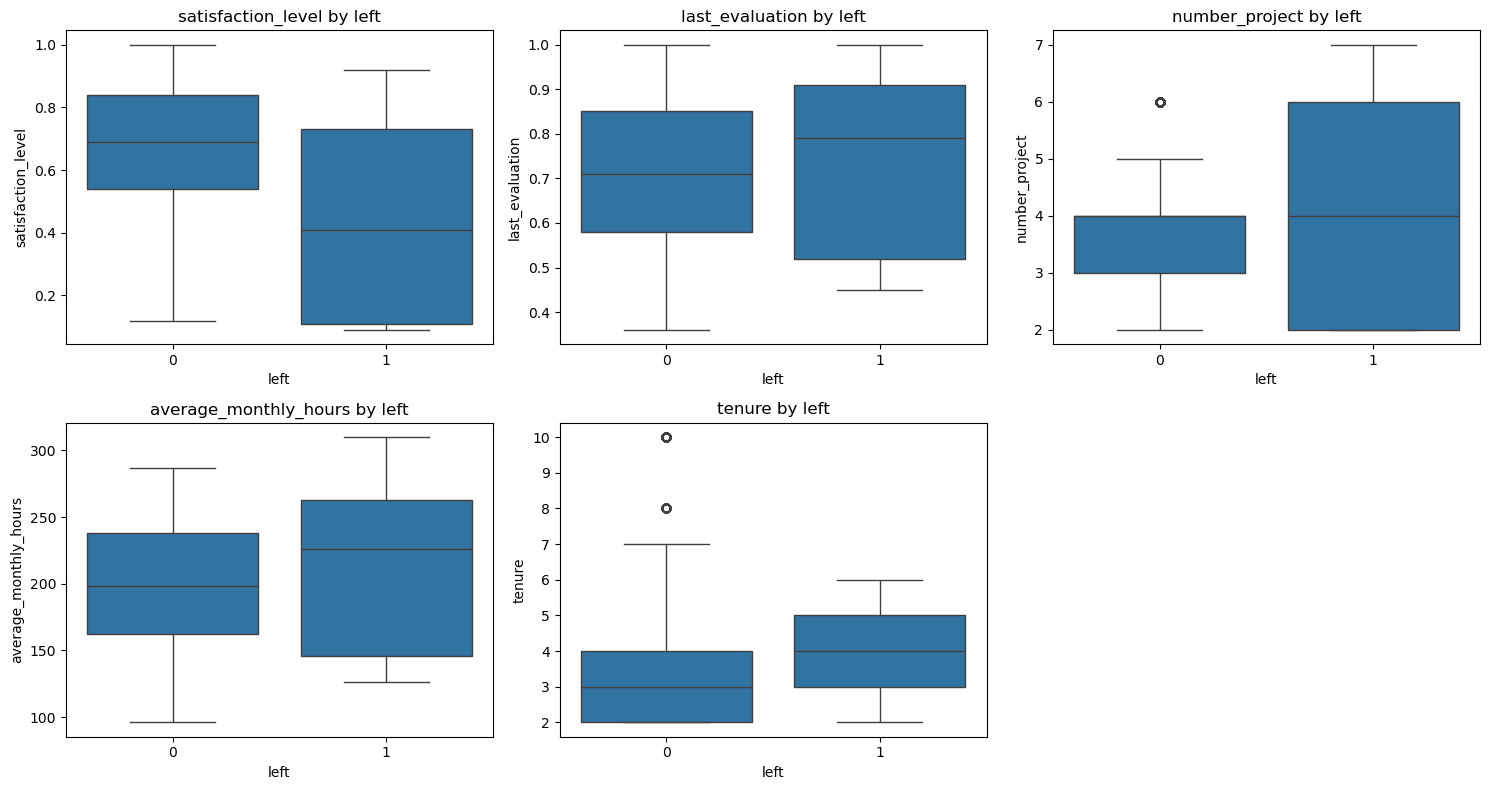

In [18]:
# Boxplots to visualize distributions of numerical features by `left`
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="left", y=col, data=df)
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

> Left has a few subgroups (the absoultely miserable and overworked, and the dissatisfied and underworked, along with those that, presumably, normally leave). Violin plots will be more informative than boxplots to show these.

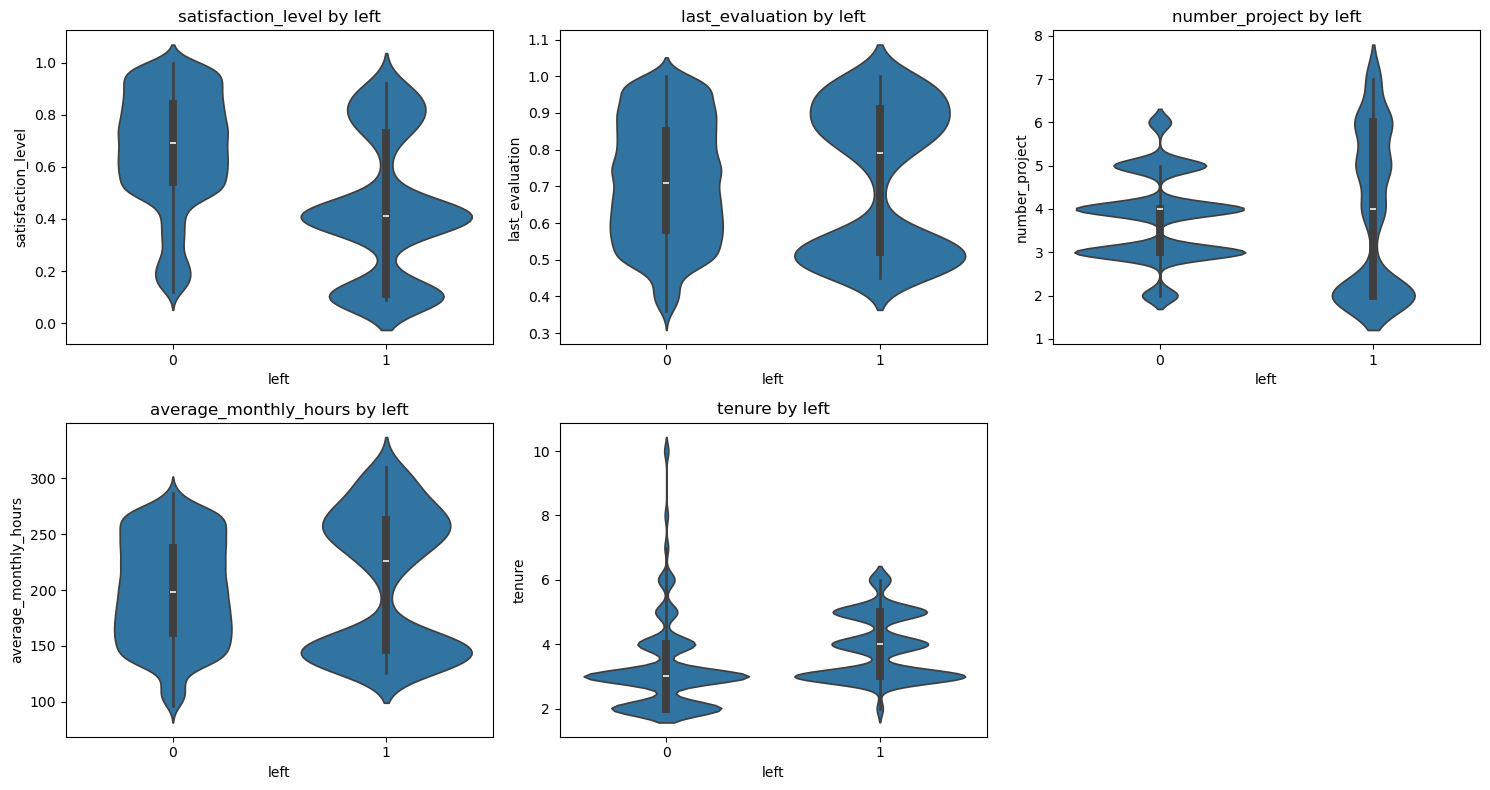

In [19]:
# Violin plots to visualize distributions of numerical features by `left`
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x="left", y=col, data=df, inner="box")
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

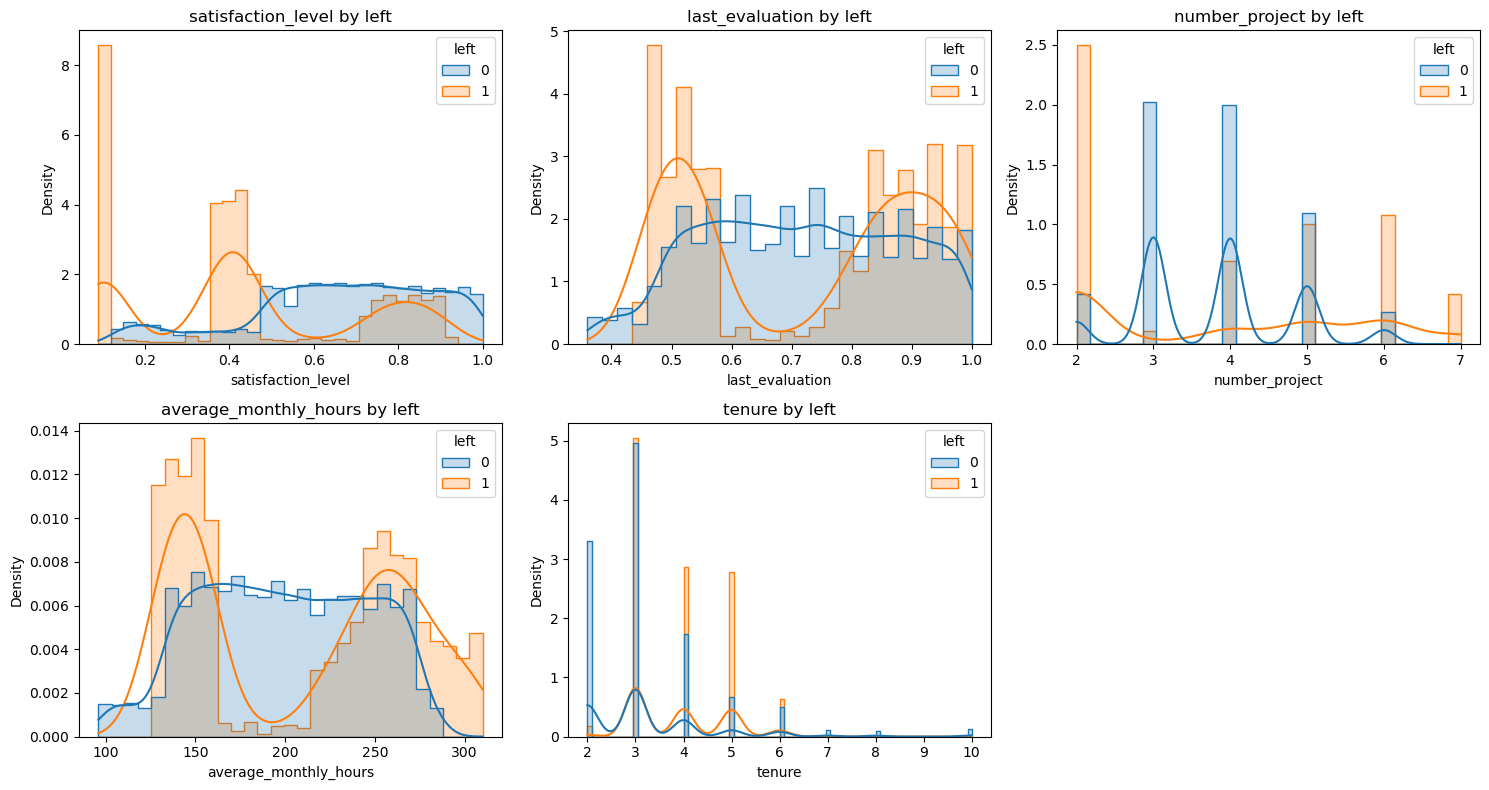

In [20]:
# Histograms to visualize distributions of numerical features
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        data=df,
        x=col,
        hue="left",
        kde=True,
        element="step",
        stat="density",
        common_norm=False,
    )
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

> Normalized above, true count below.

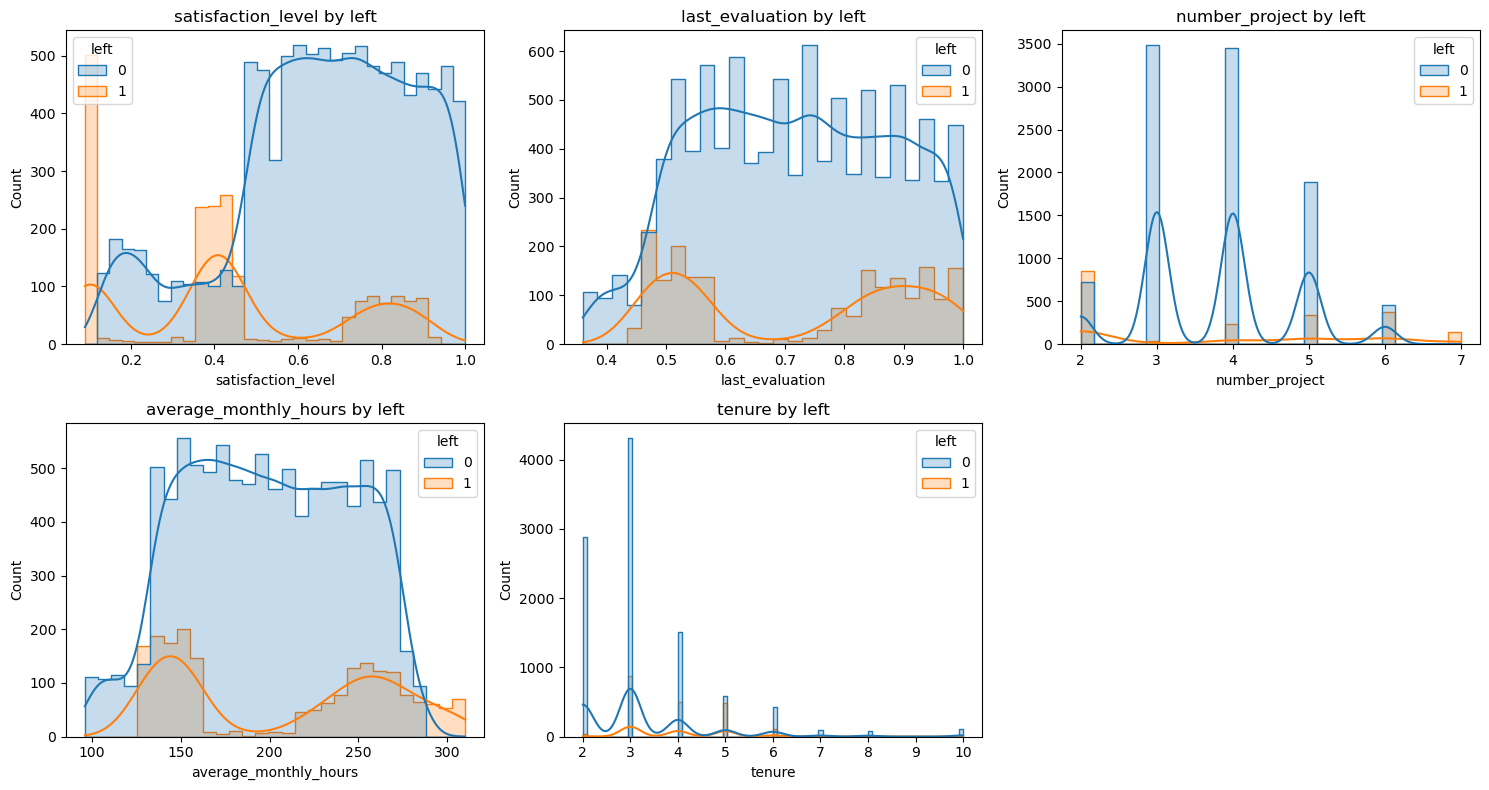

In [21]:
# Histograms to visualize distributions of numerical features (showing true count)
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue="left", kde=True, element="step", stat="count")
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

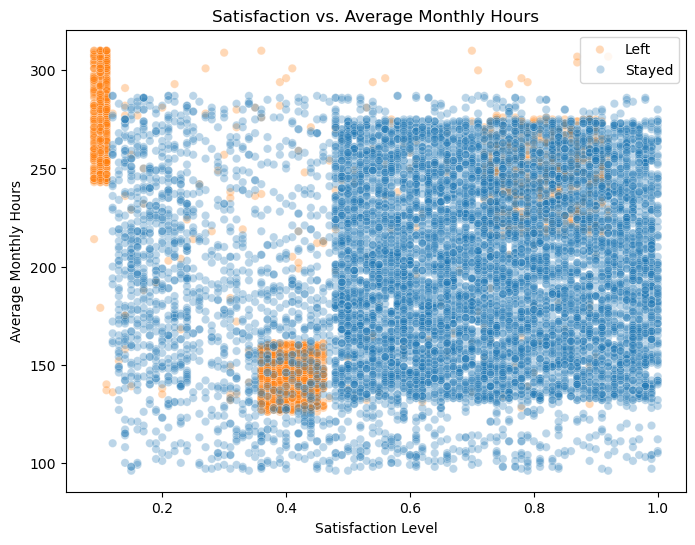

In [22]:
# Plot satisfaction vs. hours worked, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction vs. Average Monthly Hours")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

> Two big clusters of leavers: One absolutely miserable section that worked a lot of hours, and one clump that worked under a 40-hour week that was mildly dissatisfied.

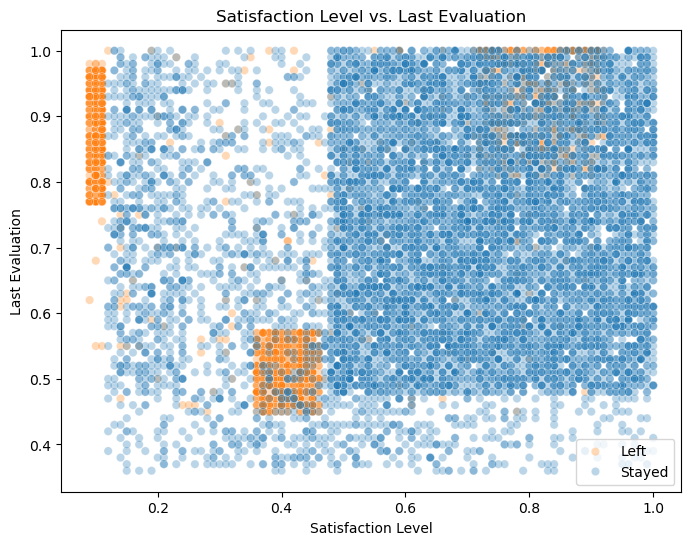

In [23]:
# Plot satisfaction level vs last evaluation, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="last_evaluation",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction Level vs. Last Evaluation")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(loc="lower right", labels=["Left", "Stayed"])
plt.show()

> It looks like almost the same plot for leavers. The absolutely miserable got pretty good evaluations, and the mildly dissatisfied got middling evaluations.

In [24]:
# Get mean and median satisfaction level for those who left vs. stayed
mean_satisfaction = df.groupby("left")["satisfaction_level"].mean()
median_satisfaction = df.groupby("left")["satisfaction_level"].median()

satisfaction_summary = pd.DataFrame(
    {"Mean": mean_satisfaction, "Median": median_satisfaction}
)

satisfaction_summary.index = satisfaction_summary.index.map({0: "Stayed", 1: "Left"})
satisfaction_summary

Mean  Median
left                    
Stayed  0.667365    0.69
Left    0.440271    0.41

> Those that left were 22% (mean) / 28% (median) less satisfied than those that stayed. Note the slight left skew with those that stayed (median higher than mean).

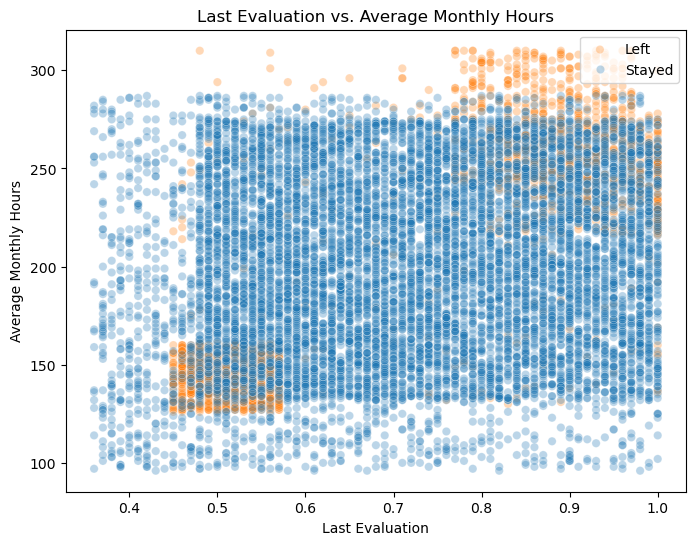

In [25]:
# Plot last evaluation vs. average monthly hours, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="last_evaluation",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Last Evaluation vs. Average Monthly Hours")
plt.xlabel("Last Evaluation")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

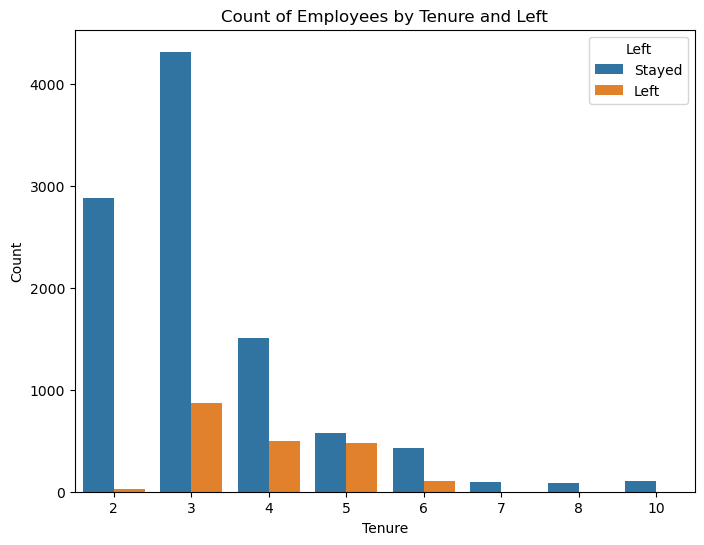

In [26]:
# Bar plot of tenure by left
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="tenure", hue="left")
plt.title("Count of Employees by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

> People especially quit at the 4 and 5 year mark. Almost nobody quits after 5 years. There's a group that just flees this company.

In [27]:
# Get total and percentage of employees by tenure and left
tenure_counts = df.groupby(["tenure", "left"]).size().unstack(fill_value=0)
tenure_percent = tenure_counts.div(tenure_counts.sum(axis=1), axis=0) * 100
tenure_summary = pd.DataFrame(
    {"Count": tenure_counts.stack(), "Percent": tenure_percent.stack()}
).reset_index()
tenure_summary.columns = ["Tenure", "Left", "Count", "Percent"]
tenure_summary["Left"] = tenure_summary["Left"].map({0: "Stayed", 1: "Left"})
tenure_summary

Tenure    Left  Count     Percent
0        2  Stayed   2879   98.934708
1        2    Left     31    1.065292
2        3  Stayed   4316   83.159923
3        3    Left    874   16.840077
4        4  Stayed   1510   75.311721
5        4    Left    495   24.688279
6        5  Stayed    580   54.613936
7        5    Left    482   45.386064
8        6  Stayed    433   79.889299
9        6    Left    109   20.110701
10       7  Stayed     94  100.000000
11       7    Left      0    0.000000
12       8  Stayed     81  100.000000
13       8    Left      0    0.000000
14      10  Stayed    107  100.000000
15      10    Left      0    0.000000

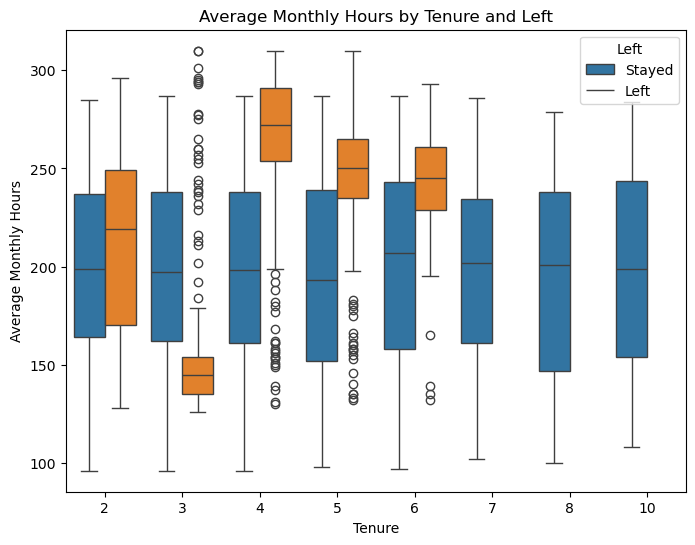

In [28]:
# Boxplot of tenure vs average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="average_monthly_hours", hue="left")
plt.title("Average Monthly Hours by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Average Monthly Hours")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

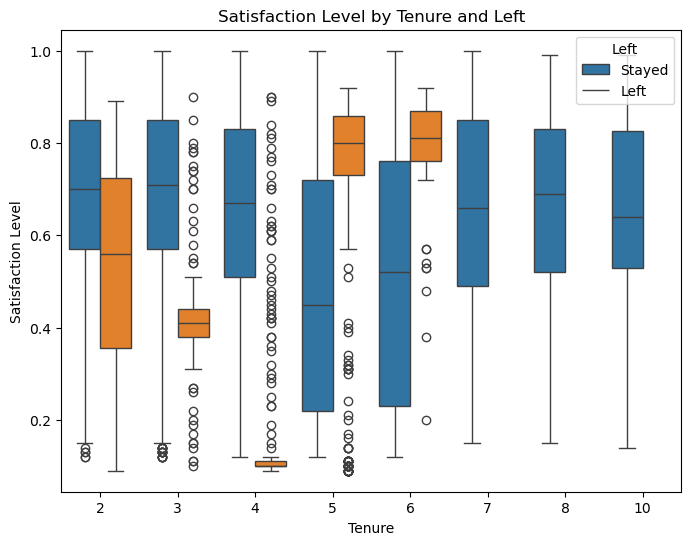

In [29]:
# Box plot of tenure vs satisfaction level, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="satisfaction_level", hue="left")
plt.title("Satisfaction Level by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Satisfaction Level")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

> Weird little clump of four-year employees that are miserable.

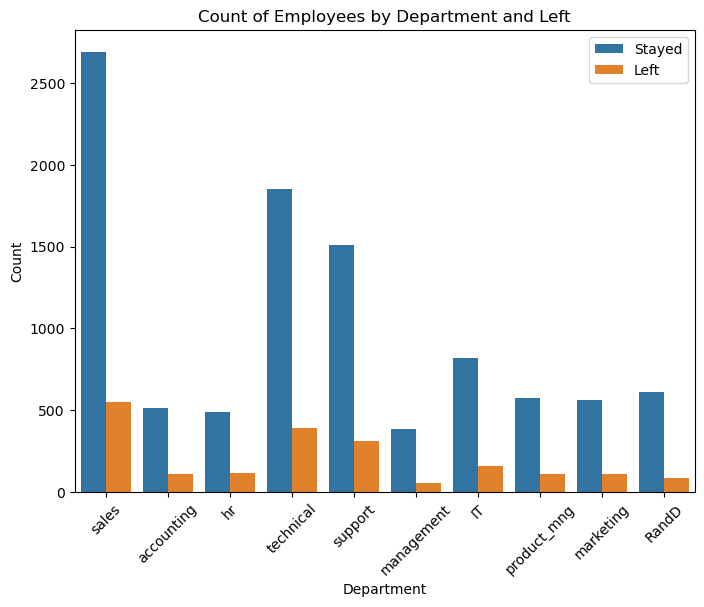

In [30]:
# Bar plot of department vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="department",
    hue="left",
)
plt.title("Count of Employees by Department and Left")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [31]:
# Get total and percentage of employees by department and left
dept_counts = df.groupby(["department", "left"]).size().unstack(fill_value=0)

# Calculate percentages within each department (row-wise)
dept_percent = dept_counts.div(dept_counts.sum(axis=1), axis=0) * 100

# Reshape for easier viewing: melt to long format
dept_summary = (
    dept_counts.join(dept_percent, lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="department", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
dept_summary[["Left", "Item"]] = dept_summary["Status"].str.extract(
    r"(\d)_(count|percent)"
)
dept_summary["Left"] = dept_summary["Left"].map({"0": "Stayed", "1": "Left"})

# Pivot so each row is department + Left, with Count and Percent columns
dept_summary = (
    dept_summary.pivot_table(
        index=["department", "Left"], columns="Item", values="Value"
    )
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

# Round Percent
dept_summary["Percent"] = dept_summary["Percent"].round(2)

dept_summary

Item   department    Left   Count  Percent
0              IT    Left   158.0    16.19
1              IT  Stayed   818.0    83.81
2           RandD    Left    85.0    12.25
3           RandD  Stayed   609.0    87.75
4      accounting    Left   109.0    17.55
5      accounting  Stayed   512.0    82.45
6              hr    Left   113.0    18.80
7              hr  Stayed   488.0    81.20
8      management    Left    52.0    11.93
9      management  Stayed   384.0    88.07
10      marketing    Left   112.0    16.64
11      marketing  Stayed   561.0    83.36
12    product_mng    Left   110.0    16.03
13    product_mng  Stayed   576.0    83.97
14          sales    Left   550.0    16.98
15          sales  Stayed  2689.0    83.02
16        support    Left   312.0    17.13
17        support  Stayed  1509.0    82.87
18      technical    Left   390.0    17.38
19      technical  Stayed  1854.0    82.62

> It's roughly proportional to the overall stay/leave split (83%/17%). Department doesn't appear to have a big impact. More granular details might help (i.e., subgroups of departments with bad managers may have higher attrition rates, but nothing currently jumps out).

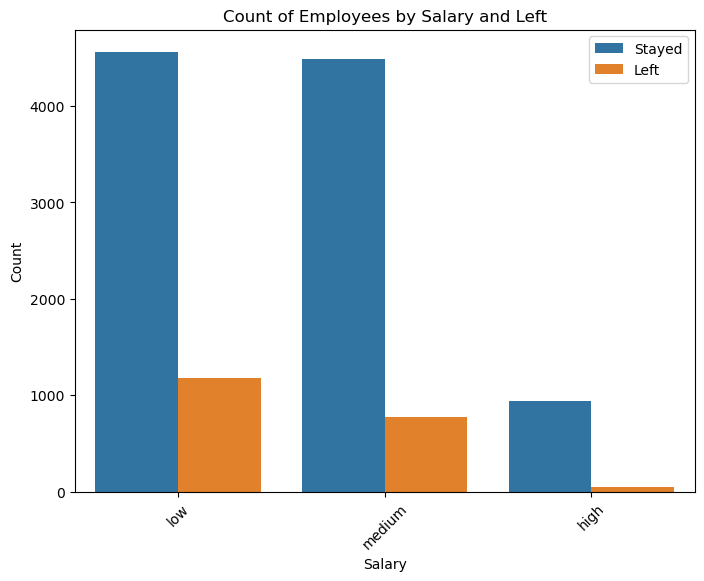

In [32]:
# Bar plot of salary vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="salary",
    hue="left",
)
plt.title("Count of Employees by Salary and Left")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [33]:
# Get total and percentage of employees by salary and left
salary_counts = df.groupby(["salary", "left"]).size().unstack(fill_value=0)
salary_percent = salary_counts.div(salary_counts.sum(axis=1), axis=0) * 100

salary_summary = (
    salary_counts.join(salary_percent, lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="salary", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
salary_summary[["Left", "Item"]] = salary_summary["Status"].str.extract(
    r"(\d)_(count|percent)"
)
salary_summary["Left"] = salary_summary["Left"].map({"0": "Stayed", "1": "Left"})

# Pivot so each row is salary + Left, with Count and Percent columns
salary_summary = (
    salary_summary.pivot_table(index=["salary", "Left"], columns="Item", values="Value")
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)
salary_summary["Percent"] = salary_summary["Percent"].round(2)
salary_summary

Item  salary    Left   Count  Percent
0       high    Left    48.0     4.85
1       high  Stayed   942.0    95.15
2        low    Left  1174.0    20.45
3        low  Stayed  4566.0    79.55
4     medium    Left   769.0    14.62
5     medium  Stayed  4492.0    85.38

> I'm not really seeing anything with salary either, beyond the expected attitude of low and high paid employees (note the 'high' salary group size is an order of magnitude smaller than 'low' and 'medium').

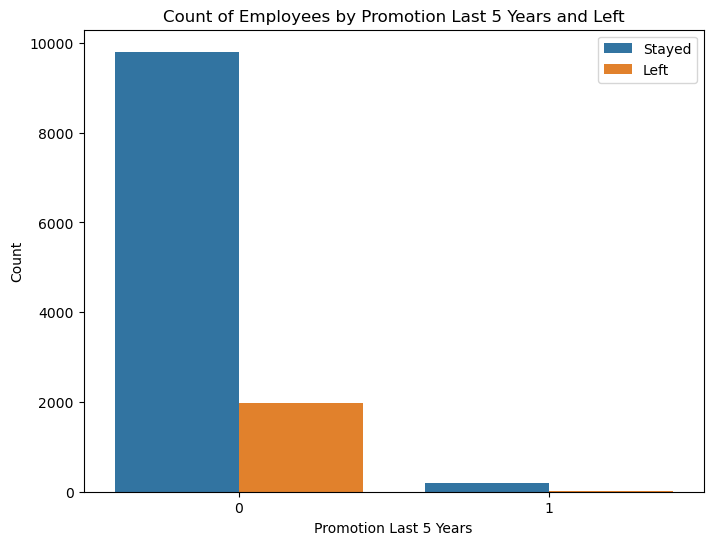

In [34]:
# Bar plot of promotion last 5 years vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="promotion_last_5years",
    hue="left",
)
plt.title("Count of Employees by Promotion Last 5 Years and Left")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

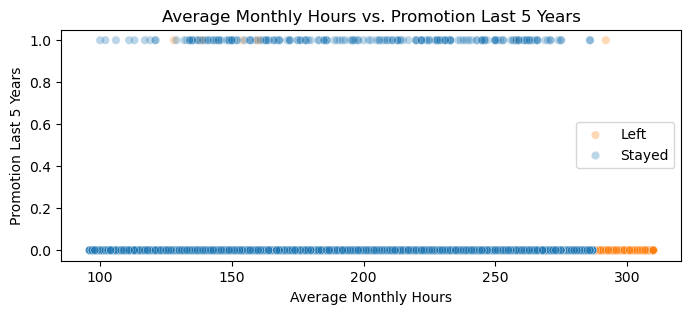

In [35]:
# Scatter plot average monthly hours vs. promotion last 5 years, colored by left
plt.figure(figsize=(8, 3))
sns.scatterplot(
    data=df,
    x="average_monthly_hours",
    y="promotion_last_5years",
    hue="left",
    alpha=0.3,
)
plt.title("Average Monthly Hours vs. Promotion Last 5 Years")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Promotion Last 5 Years")
plt.legend(loc="center right", labels=["Left", "Stayed"])
plt.show()

> Look at that group of overworked employees, not getting promoted. All of the longest working employees left.

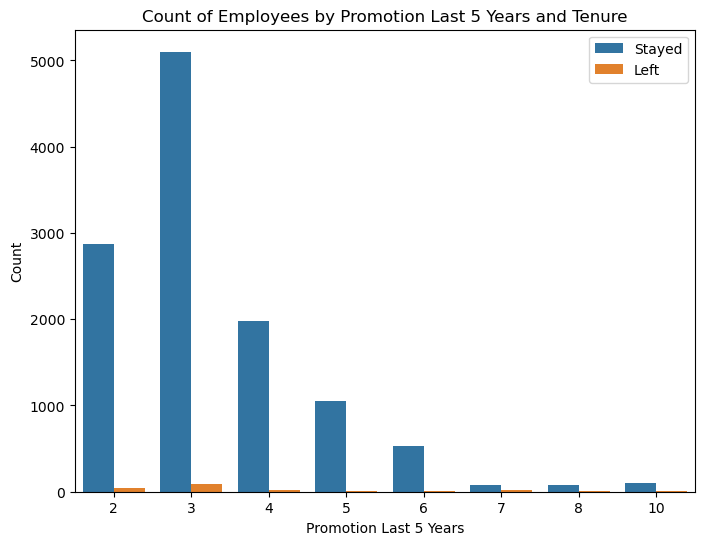

In [36]:
# Bar plot of promotion last 5 years and tenure
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="tenure",
    hue="promotion_last_5years",
)
plt.title("Count of Employees by Promotion Last 5 Years and Tenure")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

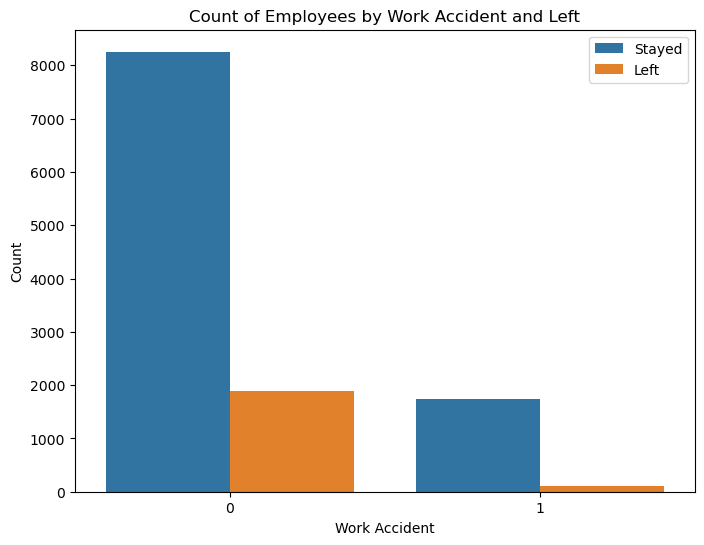

In [37]:
# Bar plot of work accident vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="work_accident",
    hue="left",
)
plt.title("Count of Employees by Work Accident and Left")
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

In [38]:
# Count and percentage for work_accident and left (work_accident first)
cross_counts = df.groupby(["work_accident", "left"]).size().unstack(fill_value=0)
cross_percent = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

summary = (
    cross_counts.astype(int)
    .join(cross_percent.round(2), lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="work_accident", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
summary[["left", "Item"]] = summary["Status"].str.extract(r"(\d)_(count|percent)")
summary["left"] = summary["left"].map({"0": "Stayed", "1": "Left"})
summary["work_accident"] = summary["work_accident"].map({0: "No", 1: "Yes"})

# Pivot for easier viewing
summary = (
    summary.pivot_table(index=["work_accident", "left"], columns="Item", values="Value")
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

summary

Item work_accident    left   Count  Percent
0               No    Left  1886.0    18.60
1               No  Stayed  8255.0    81.40
2              Yes    Left   105.0     5.68
3              Yes  Stayed  1745.0    94.32

> Seems like a fluke, but it's funny that having a work accident is correlated with being less likely to leave. Otherwise, normal

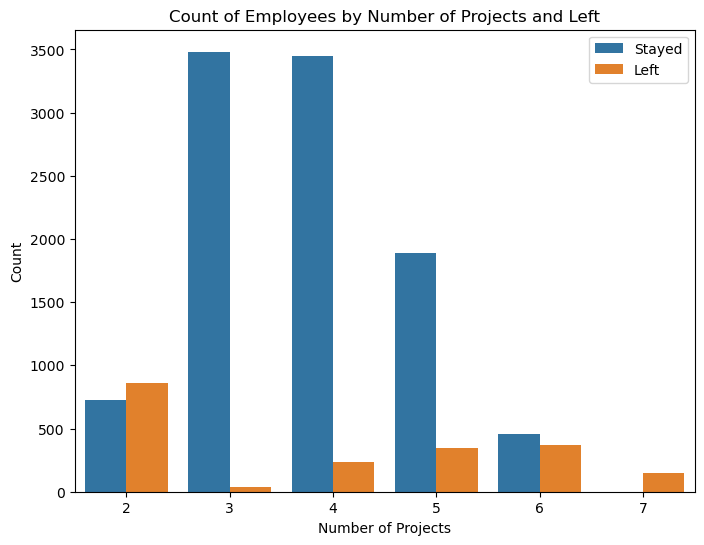

In [39]:
# Bar plot of number of projects vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="left",
)
plt.title("Count of Employees by Number of Projects and Left")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

In [40]:
# Count and percentage for number_project and left (number_project first)
cross_counts = df.groupby(["number_project", "left"]).size().unstack(fill_value=0)
cross_percent = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

summary = (
    cross_counts.astype(int)
    .join(cross_percent.round(2), lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="number_project", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
summary[["left", "Item"]] = summary["Status"].str.extract(r"(\d)_(count|percent)")
summary["left"] = summary["left"].map({"0": "Stayed", "1": "Left"})

# Pivot for easier viewing
summary = (
    summary.pivot_table(
        index=["number_project", "left"], columns="Item", values="Value"
    )
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

summary

Item  number_project    left   Count  Percent
0                  2    Left   857.0    54.17
1                  2  Stayed   725.0    45.83
2                  3    Left    38.0     1.08
3                  3  Stayed  3482.0    98.92
4                  4    Left   237.0     6.43
5                  4  Stayed  3448.0    93.57
6                  5    Left   343.0    15.36
7                  5  Stayed  1890.0    84.64
8                  6    Left   371.0    44.92
9                  6  Stayed   455.0    55.08
10                 7    Left   145.0   100.00
11                 7  Stayed     0.0     0.00

> Yeah, number of projects is a predictor. Might as well be a giant neon sign blinking here. Ha! 100% of people with 7 projects left.

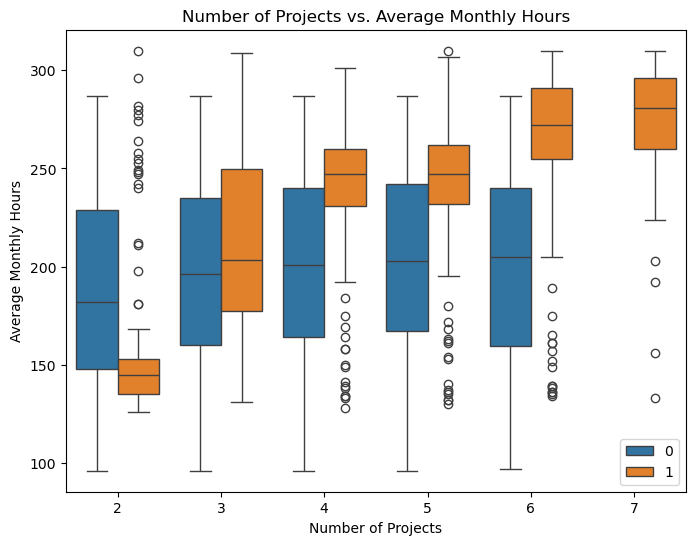

In [41]:
# Boxplot of number of projects vs. average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="average_monthly_hours",
    hue="left",
)
plt.title("Number of Projects vs. Average Monthly Hours")
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="lower right")
plt.show()

> No outliers for those who stayed. Mostly a function of small sample size? Those who left appear to have been either overworked or underworked. Who has 7 projects and works only 120 hours a week? Weird.

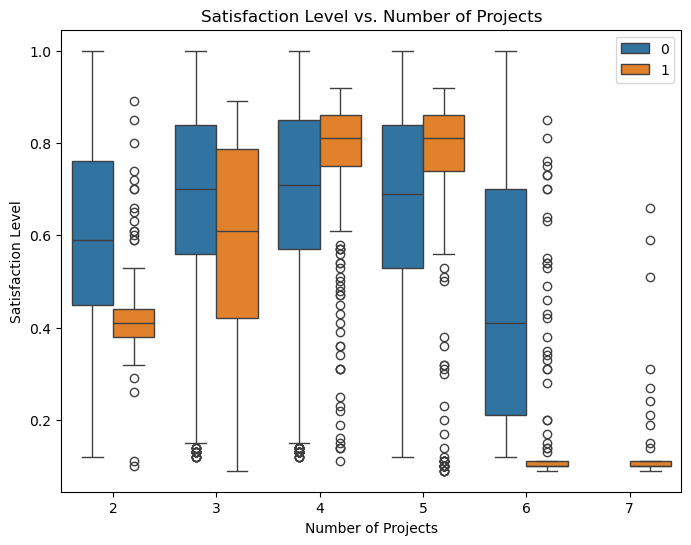

In [42]:
# Boxplot of satisfaction level vs number of projects, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="satisfaction_level",
    hue="left",
)
plt.title("Satisfaction Level vs. Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Satisfaction Level")
plt.legend(loc="upper right")
plt.show()

> Look at that clump of miserable people with many projects.

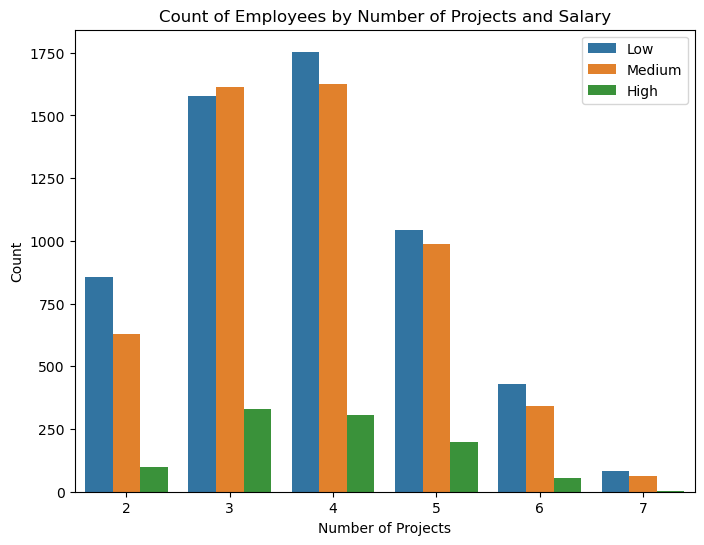

In [43]:
# Bar plot of number of projects vs salary
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="salary",
)
plt.title("Count of Employees by Number of Projects and Salary")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Low", "Medium", "High"])
plt.show()

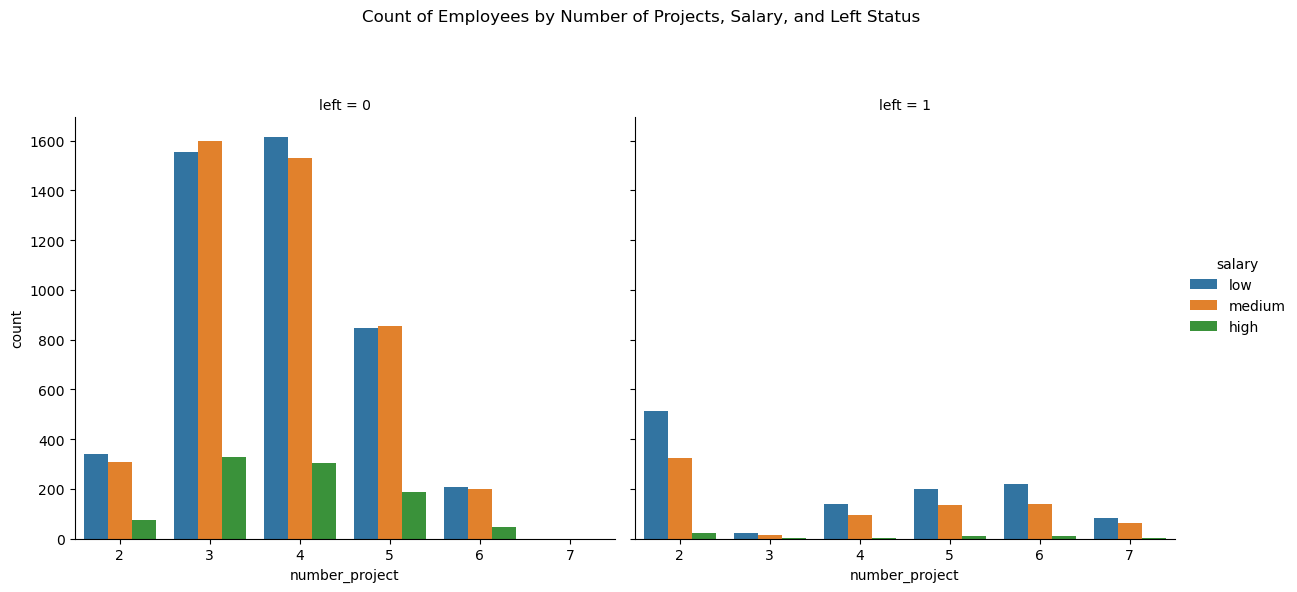

In [44]:
# Bar plot of number of projects vs salary, separated by left
sns.catplot(
    data=df,
    x="number_project",
    hue="salary",
    col="left",
    kind="count",
    height=6,
    aspect=1,
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Count of Employees by Number of Projects, Salary, and Left Status")
plt.show()

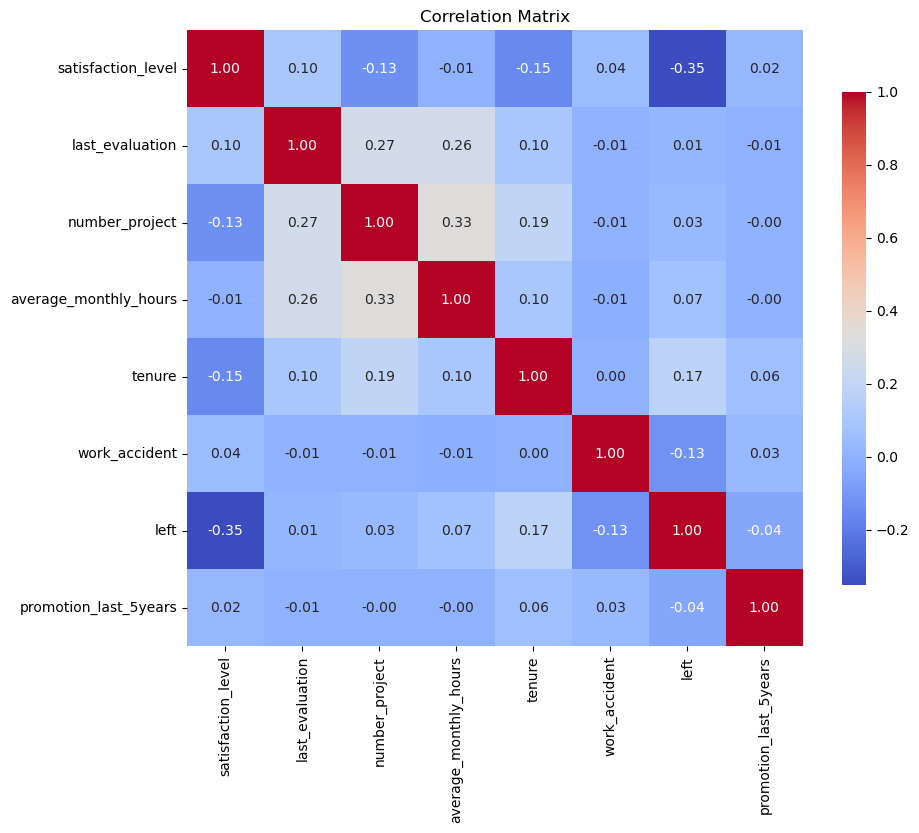

In [45]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.select_dtypes(include=[np.number]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix")
plt.show()

> No strong multicollinearity. Leaving is negatively correlated with satisfaction. Monthly hours, evaluations, and number of projects are somewhat positively correlated.

### Insights

> The data suggests significant issues with employee retention at this company. Two main groups of leavers emerge:
>
> - **Underworked and Dissatisfied:** Some employees worked on fewer projects and logged fewer hours than a standard work week, with below-average satisfaction. These individuals may have been disengaged, assigned less work as they prepared to leave, or possibly let go.
> - **Overworked and Burned Out:** Another group managed a high number of projects (up to 7) and worked exceptionally long hours (sometimes approaching 80-hour weeks). This group reported very low satisfaction and received few, if any, promotions.
>
> Most employees work well above a typical 40-hour work week (160–184 hours/month, 20-23 work days/month), indicating a culture of overwork. The lack of promotions and high workload likely contribute to dissatisfaction and attrition.
>
> **Employee evaluation scores** show only a weak relationship with attrition; both leavers and stayers have similar performance reviews. High-performing employees are not necessarily retained, especially if they are overworked or dissatisfied.
>
> Other variables—such as department, salary, and work accidents—do not show strong predictive value for employee churn compared to satisfaction and workload.
>
> Overall, the data points to management and workload issues as primary drivers of employee turnover.

<a id="pace-construct-stage"></a>

# paCe: Construct Stage
[Back to top](#)

- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


> #### **Overview of Models Used**
>
> Mostly a cheat sheet for myself for future reference
>
> I'm learning, so I'm going to build and tune several types, but I suspect the random forest or gradient boosted model will perform best. First, a review of model options, and pros / cons of each.
>
> **Logistic regression:** Interpretable, fast, good for simple relationships, but limited to linear patterns. Good for baselines, explainable models.
> - Needs: Scaled numeric features; imputed missing values.
> - Watch for: Multicollinearity, non-linear patterns it can't capture, outliers.
> - Good with: Clean, linearly separable data.
> - Ease of programming: `sklearn.linear_model.LogisticRegression` — one-liner with few params.
> - Key risk: Misleading results if the relationship is non-linear or assumptions (e.g. independence, no multicollinearity) are violated.
>
> Decision trees: Transparent, handles non-linear data well, but overfits easily. Good for quick models, rule-based logic.
> - Needs: Clean, complete data; no need for scaling.
> - Watch for: Overfitting from deep trees or noisy features, outliers.
> - Good with: Categorical and mixed-type features; interpretable rules.
> - Ease of programming: `sklearn.tree.DecisionTreeClassifier` — fast setup, good for teaching.
> - Key risk: Overfitting, especially with deep trees or small sample sizes.
>
> Random forests: Robust, reduces overfitting, high accuracy, but less interpretable, slower. Good for strong general-purpose performance.
> - Needs: Complete-ish data (some robustness); no scaling.
> - Watch for: Bias from dominant features; slower with high-dimensional data. Less sensitive to outliers than single trees.
> - Good with: Large feature sets, avoiding overfitting, feature importance.
> - Ease of programming: `sklearn.ensemble.RandomForestClassifier` — easy but slower to train.
> - Key risk: Slower on very large datasets; can be harder to interpret.
>
> Gradient boosting: Best accuracy, learns from errors iteratively, but complex, needs tuning, less interpretable. Good for optimizing structured data problems.
> - Needs: Clean data; impute missing values (or use LightGBM); no scaling.
> - Watch for: Noisy (incorrect, inconsistent) labels, overlapping classes, overfitting if untuned.
> - Good with: Tabular data with complex interactions and nonlinearity.
> - Ease of programming: `xgboost.XGBClassifier` — requires parameter tuning but manageable.
> - Key risk: Overfitting if not properly regularized or if too many boosting rounds are used.
>
> Logistic regression and decision trees are easiest to interpret. Gradient boosters usually predict the best.

> ### **The Plan**
>
>#### **Meticulous planning and sequencing, out of fear of data leakage**
> 
> Data cleaning & EDA (done)
>
> Encode categorical variables
> - Scale numeric variables for logistic regression only
> - Remove outliers for logistic regression (maybe XGBoost)
>
> Create df to save results
>
> y = Create target `left`
>
> X = Train/test split (hold test set until the very end)
> - stratify target, test size 20%
>
> During initial explorations:
> - Use RandomizedSearchCV for RandomForest and XGBoost
> - GridSearchCV for Logistic Regression and Decision Trees
>
> Baseline models
> - LogReg, Tree, RF, XGBoost
> - default hyperparameters, cross_val_score
> - compare accuracy, precision, recall, F1, ROC, AUC, confusion matrix
> - save metrics
>
> Review Feature Importance and EDA, to inform model refinements
> Check the misclassified for where the model failed (in this case, due to "gray areas", groups of employees neither obviously safe or obviously at risk of quitting)
>
> Feature Engineering Ideas
> - Binning: number of projects, monthly hours, satisfaction level, tenure
> - Interactions: satisfaction * projects, satisfaction * monthly hours, evaluation * satisfaction, salary * satisfaction, monthly hours / projects (could then bin hours / projects)
> - Categorical flags: no promotion 4+ years, burnout class (projects >= 6||5, hours >= 240, satisfaction <= 0.3), disengaged class (projects <= 2, hours < 160, satisfaction <= 0.5)
> - Feature selection: drop a few features, especially for improving logistic regression
>
> Run featured engineered models, save metrics
>
> Compare models and choose best for each type
> - refit on full X_train
> - use early stopping for xgboost when fitting (GridSearchCV + Pipeline do not support early_stopping_rounds)
>
> Final test set evaluation (one per model)
>
> Select a winner
>
> Table of results (recall, precision, f1, accuracy, roc auc)
> Feature Importance Plots
> Decision Tree Viz
> ROC Curve (PR-ROC) Plots
> Misclassification Analysis
> Model Interpretation
> Key findings (which model is best & why)
> Actionable business rec's
> Limitations and ethical concerns
> Relevant appendices

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

> **Decison Trees, Random Forests, and Gradient Boosting assumptions**
>
> Added for comparison to LogReg
> - Do not need linearity
> - Do not need scaling
> - Tolerate multicollinearity
> - Affected by outliers (exception: random forests only mildly)
> - Need large sample size (exception: decision trees will work with limited data, but less accuracy)


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> **Observations from Baseline Model Building:**  
> - **Logistic Regression performed much worse** than tree-based models (recall: 0.24 vs. >0.90 for others). This suggests the relationship between features and attrition is highly non-linear, or that important interactions are not captured by a linear model.
> - **Tree-based models (Decision Tree, Random Forest, XGBoost) all performed very well** (recall >0.90, AUC >0.97), with XGBoost slightly ahead. Surprisingly strong for a shallow Decision Tree (max depth 4). This may indicate the data is either easy to separate or possibly a bit too “clean” (the dataset is synthetic).
> - **Confusion matrices show very few false negatives** for tree-based models, but Logistic Regression misses many true leavers.
>
> **Independent Variables Chosen:**  
> - All available features were included: satisfaction_level, last_evaluation, number_project, average_monthly_hours, tenure, work_accident, promotion_last_5years, salary (ordinal), and department (one-hot encoded).
> - This approach ensures the model can capture all possible relationships, especially since EDA showed satisfaction, workload, and tenure are strong predictors.
>
> **Model Assumptions Met:**  
> - **Logistic Regression:** Outliers were removed and features were scaled. Outcome is categorical and observations are independent (dropped duplicates). Sample size is ample. Multicollinearity was checked in heatmap at end of EDA. The poor performance suggests the linearity assumption is not met.
> - **Tree-based models:** No strong assumptions about feature scaling, linearity, or multicollinearity; these models are robust to the data structure provided.
>
> **Model Fit:**  
> - **Tree-based models fit the data extremely well** (recall, precision, and AUC all very high). This suggests strong predictive power, but also raises the possibility of overfitting.
> - **Logistic Regression fits poorly**, missing most true positives.
>
> **Potential Improvements:**  
> - **Feature engineering:** (Will do.) Create interaction terms or non-linear transformations (e.g., satisfaction × workload, tenure bins) to help linear models like Logistic Regression capture more complex relationships. Consider feature selection to remove redundant or less informative variables.
> - **Interpretability:** (Will do.) Use feature importance plots for tree-based models and SHAP values to explain individual predictions and overall model behavior. This will help stakeholders understand which factors drive attrition risk.
> - **Model validation:** (Done.) Rigorously check for data leakage by reviewing the entire data pipeline, ensuring all preprocessing steps are performed only on training data within cross-validation folds.
> - **Class imbalance:** (Might do.) Although recall is high, further address class imbalance by experimenting with resampling techniques (e.g., SMOTE, undersampling) or adjusting class weights, especially if the business wants to minimize false negatives.
> - **Alternative Models:** (Won't do anytime soon.) Try other algorithms (e.g., LightGBM, SVM, or neural networks) or ensemble approaches to see if performance or interpretability can be improved.
> - **Time series data** (Don't have it.) If this was real-world data, it would be nice to track changes over time in work satisfaction, performance reviews, workload, promotions, absences, etc.
>
> **Resources Used:**  
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)
> - [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/)
> - [pandas documentation](https://pandas.pydata.org/docs/)
> - [seaborn documentation](https://seaborn.pydata.org/)
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
>
> **Ethical Considerations:**  
> - Ensure predictions are used to support employees (e.g., for retention efforts), not for punitive actions.
> - Ensure the model does not unfairly target or disadvantage specific groups (e.g., by department, salary, or tenure).
> - Clearly communicate how predictions are made and how they will be used by HR.
> - Protect employee data and avoid using sensitive or personally identifiable information.
> - Regularly audit the model for bias and unintended consequences after deployment.

<a id="model-building"></a>

## Model Building
[Back to top](#)
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

> Binary classification

### Identify the types of models most appropriate for this task.

> It's a prediction model. I'm building a logistic regression and Tree-based models (Decision tree, random forest, gradient boasting).

### Modeling

### **Model prep**

> #### **Choose evaluation metric**
>
> While **ROC AUC** is a common metric for evaluating binary classifiers—offering a threshold-independent measure of how well the model distinguishes between classes—it is **not ideal for imbalanced problems like employee churn**, where the positive class (those likely to leave) is much smaller and more critical to identify.
>
> During model development, I did review ROC AUC to get a general sense of model discrimination. However, for **model selection and tuning**, I ultimately prioritized **recall**. A high recall ensures that we identify as many at-risk employees as possible, aligning with the company's goal to support retention through early intervention. Missing a potential churner (a false negative) is generally more costly than mistakenly flagging someone who is not at risk (a false positive), especially when interventions are supportive rather than punitive.
>
> While precision is also important—since too many false positives could dilute resources or create unnecessary concern—recall is more aligned with a **proactive retention strategy**. This tradeoff assumes that HR interventions are constructive and that the company has systems in place to act ethically on model outputs.
>
> To avoid unintended harm, I recommend implementing **clear usage guidelines** and **transparency** measures, ensuring that predictions are used to help employees, not penalize them. Calibration and regular fairness audits should accompany any deployment of the model.

> ## **Evaluation Tie Breaker**
>
> One final twist (I hope). I made the classic mistake of not clearly and rigidly defining success, and I now have a bunch of models that are all excellent at recall, hovering in the 0.93-0.96 range. So I'm making a post-hoc call. At least this one, I'm planning ahead of time. The best model (of each type) will be chosen based on the following tie-breakers (in order):
> - recall > 0.935
> - f2 > 0.85 (f2 is a new score, weighing recall at 80%, and precision at 20%)
> - fewest number of features
> - highest f2
> - highest precision
>
> I should hope i can make a choice by then. there can't be that many models. I... hehehe... predict... that I'll have it by number three, fewest number of features

In [46]:
# set evaluation metric
scoring = "recall"


# for XGBoost eval_metric
def get_xgb_eval_metric(scoring):
    mapping = {
        "roc_auc": "auc",  # area under ROC curve
        "accuracy": "error",  # classification error rate
        "f1": "logloss",  # logarithmic loss (not F1, but closest available)
        "precision": "logloss",  # no direct precision metric, logloss is a common fallback
        "recall": "logloss",  # no direct recall metric, logloss is a common fallback
    }
    return mapping.get(scoring, "auc")  # default to 'auc' if not found

#### **Encode categorical variables**

In [47]:
# copy the dataframe to avoid modifying the original
df_enc = df.copy()

# encode salary as ordinal
df_enc["salary"] = df_enc["salary"].map({"low": 0, "medium": 1, "high": 2})

# encode department as dummies
df_enc = pd.get_dummies(df_enc, columns=["department"])

# confirm the changes
print("Original salary values:\n", df["salary"].value_counts())
print("\nEncoded salary values:\n", df_enc["salary"].value_counts())
df_enc.columns

Original salary values:
 salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

Encoded salary values:
 salary
0    5740
1    5261
2     990
Name: count, dtype: int64


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

#### **Split data into baseline train / test.**

> One set for tree-based models (decision tree, random forest, XGBoost), another set for logistic regression (which must have outliers removed and data normalized). Stratify the target variable each time to account for class imbalance.

In [48]:
# split the data into features and target variable for tree-based models
X = df_enc.drop(columns=["left"])
y = df_enc["left"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale_pos_weight for XGBoost (ratio of negative to positive class in training set)
scale_pos_weight_value = (y_train == 0).sum() / (y_train == 1).sum()

In [49]:
# split the data into features and target variable for logistic regression
# remove outliers from tenure for logistic regression
df_enc_lr = df_enc.copy()

"""
outliers defined waaaaaay up above, 
at end of inital data exploration and cleaning
code not needed here, but copied for reference
"""
# q1 = df.tenure.quantile(0.25)
# q3 = df.tenure.quantile(0.75)
# iqr = q3 - q1
# upper_bound = q3 + 1.5 * iqr

# remove outliers
df_enc_lr = df_enc_lr[df_enc_lr.tenure < upper_bound]

X_lr = df_enc_lr.drop(columns=["left"])
y_lr = df_enc_lr["left"]

# split the data into training and testing sets for logistic regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr
)

> I am realizing now (as I prepare to embark on feature transformation below) that some of this categorical encoding and outlier removal would more appropriately have been done in the Pipeline. But it's simple stuff. Not a dealbreaker.

#### **Functions to make models, run models, plot confusion matrices and feature importances**

In [50]:
def make_models_config(
    models,
    X_train,
    y_train,
    feature_func=None,  # can be a function, list, dict, or None
    param_grids=None,
    scaler=None,
    name_suffix="",
):
    """
    Build models_config for run_model_evaluation.
    - models: dict of {name: estimator}
    - X_train, y_train: training data
    - feature_func: function, list of functions, dict of {name: func}, or None
    - param_grids: dict of {name: param_grid} (or None for empty)
    - scaler: sklearn transformer (e.g., StandardScaler) or None
    - name_suffix: string to append to model name
    """
    configs = []
    for name, model in models.items():
        # order of steps matters, features first, then scaler, then model
        steps = []

        # determine which feature_func to use for this model
        func = None
        if isinstance(feature_func, dict):  # dict of {name: func}
            func = feature_func.get(name)
        elif callable(feature_func) or isinstance(feature_func, list):
            func = feature_func
        # handles a list of feature functions (apply in sequence), or a single function
        if func is not None:
            if isinstance(func, list):
                for i, f in enumerate(func):
                    steps.append((f"features_{i+1}", FunctionTransformer(f)))
            else:
                steps.append(("features", FunctionTransformer(func)))

        # add scaler if provided
        if scaler is not None:
            steps.append(("scaler", scaler))

        # add model
        steps.append(("model", model))

        # create the pipeline
        pipe = Pipeline(steps)

        # add parameter grid if provided
        param_grid = {}
        if isinstance(param_grids, dict):
            param_grid = param_grids.get(name, {})

        # add model configuration to the list
        configs.append(
            {
                "name": f"{name}{name_suffix}",
                "X_train": X_train,
                "y_train": y_train,
                "pipeline": pipe,
                "param_grid": param_grid,
            }
        )
    return configs

In [51]:
from sklearn.model_selection import RandomizedSearchCV


def run_model_evaluation(
    models_config,
    results_df=None,
    scoring="recall",
    save_model=False,
    search_type="grid",
    n_iter=20,
):
    """
    Run model training and evaluation for a list of model configurations using cross-validated hyperparameter search.

    For each model configuration, performs hyperparameter tuning (GridSearchCV or RandomizedSearchCV),
    fits the best pipeline, evaluates cross-validated performance metrics, and optionally saves the best model.

    Parameters:
        models_config (list of dict): List of model configurations, each containing:
            - 'name': Model name (str)
            - 'X_train': Training features (pd.DataFrame or np.ndarray)
            - 'y_train': Training labels (pd.Series or np.ndarray)
            - 'pipeline': sklearn Pipeline object
            - 'param_grid': dict of hyperparameters for search
        results_df (pd.DataFrame or None): Existing results DataFrame to append to, or None to create a new one.
        scoring (str): Scoring metric for model selection (e.g., 'recall', 'accuracy', 'roc_auc').
        save_model (bool): If True, saves the best model pipeline to disk for each configuration.
        search_type (str): 'grid' for GridSearchCV, 'random' for RandomizedSearchCV.
        n_iter (int): Number of parameter settings sampled for RandomizedSearchCV (ignored for grid search).

    Returns:
        pd.DataFrame: Results DataFrame with model name, metrics (recall, f1, roc_auc, precision, accuracy),
                      number of features, best hyperparameters, best CV score, confusion matrix, and search time.

    Notes:
        - Uses stratified 5-fold cross-validation for both hyperparameter search and out-of-fold predictions.
        - Calculates metrics on cross-validated predictions for robust performance estimates.
        - Handles models that do not support predict_proba for ROC AUC gracefully.
        - Saves models to '../results/saved_models/' if save_model=True.
    """
    if results_df is None:
        results_df = pd.DataFrame(
            columns=[
                "model",
                "recall",
                "f2", # 80% recall, 20% precision (metric created to weigh recall more heavily)
                "f1",
                "roc_auc",
                "precision",
                "accuracy",
                "features",
                "best_params",
                "cv_best_score",
                "conf_matrix",
                "search_time",
            ]
        )

    # ensure cross-validation is stratified for balanced class distribution
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for cfg in models_config:
        # time the model training and evaluation
        start_time = time.time()
        print(f"Running model: {cfg['name']}...")

        # conditional to choose search type, instantiate the appropriate search class
        if search_type == "random":
            grid = RandomizedSearchCV(
                cfg["pipeline"],
                cfg["param_grid"],
                n_iter=n_iter,
                cv=cv,
                scoring=scoring,
                n_jobs=-1,
                verbose=2,
                random_state=42,
            )
        else:
            grid = GridSearchCV(
                cfg["pipeline"],
                cfg["param_grid"],
                cv=cv,
                scoring=scoring,
                n_jobs=-1,
                verbose=2,
            )

        # fit the grid search to the training data
        grid.fit(cfg["X_train"], cfg["y_train"])

        # print the execution time
        end_time = time.time()
        search_time = end_time - start_time
        print(f"Execution time for {cfg['name']}: {search_time:.2f} seconds")

        # get the best model and its parameters
        best_model = grid.best_estimator_
        print(f"Best parameters for {cfg['name']}: {grid.best_params_}")
        print(f"Best score for {cfg['name']}: {grid.best_score_:.4f} ({scoring})")

        # --- get the number of features after all pipeline steps ---
        # try to transform X_train through all steps except the final estimator
        try:
            if hasattr(best_model, "named_steps"):
                # Remove the final estimator step
                steps = list(best_model.named_steps.items())
                if len(steps) > 1:
                    # Remove last step (the model)
                    feature_pipeline = Pipeline(steps[:-1])
                    X_transformed = feature_pipeline.transform(cfg["X_train"])
                    n_features = X_transformed.shape[1]
                else:
                    n_features = cfg["X_train"].shape[1]
            else:
                n_features = cfg["X_train"].shape[1]
        except Exception as e:
            print(f"Could not determine number of features: {e}")
            n_features = cfg["X_train"].shape[1]

        # conditional to save the best model
        if save_model:
            model_path = f"../results/saved_models/{cfg['name'].replace(' ', '_').lower()}.joblib"
            joblib.dump(best_model, model_path)
            print(f"Model {cfg['name']} saved successfully.\n")
        else:
            print(f"Model {cfg['name']} not saved. Set save_model=True to save it.\n")

        # make predictions using cross-validation to generate out-of-fold predictions for each training sample
        # translation:
        # substitute for setting aside a validation set
        # takes more time, but provides better estimates of model performance
        # it makes a prediction for each sample in the training set, using a different fold of the data for each prediction...
        # ...the fold where the sample is not included in the 80% training set (the sample is in the 20%)
        y_pred = cross_val_predict(
            best_model, cfg["X_train"], cfg["y_train"], cv=cv, n_jobs=-1
        )

        # # check misclassified cases for further analysis
        # print(f"Misclassified cases for {cfg['name']}:")
        # misclassified = cfg['X_train'].copy()
        # misclassified['actual'] = cfg["y_train"]
        # misclassified['predicted'] = y_pred
        # misclassified = misclassified[misclassified['actual'] != misclassified['predicted']]

        # # Show counts of each type of misclassification
        # counts = misclassified.groupby(['actual', 'predicted']).size().rename('count')
        # print("\nMisclassification counts:")
        # print(counts)
        # print()

        # # Show .describe() for each group, side by side
        # pd.set_option('display.max_columns', None)
        # for (actual, predicted), group in misclassified.groupby(['actual', 'predicted']):
        #     label_map = {0: "Stayed", 1: "Left"}
        #     print(f"--- Misclassified: Actual={label_map.get(actual, actual)}, Predicted={label_map.get(predicted, predicted)} (n={len(group)}) ---")
        #     print(group.describe().T)
        #     print()
        # pd.reset_option('display.max_columns')
        # print("\n")

        # calculate the ROC AUC score, need predicted probabilities (not just class labels, but confidence in those labels)
        # try / except block to handle models that do not support predict_proba (e.g., SVC)
        try:
            y_proba = cross_val_predict(
                best_model,
                cfg["X_train"],
                cfg["y_train"],
                cv=cv,
                method="predict_proba",
                n_jobs=-1,
            )
            roc_auc = roc_auc_score(cfg["y_train"], y_proba[:, 1])
        except (AttributeError, ValueError):
            roc_auc = np.nan
            print(f"Model {cfg['name']} does not support predict_proba.")

        # save results in the results dataframe
        results_df.loc[len(results_df)] = {
            "model": cfg["name"],
            "features": n_features,
            "accuracy": accuracy_score(cfg["y_train"], y_pred),
            "precision": precision_score(cfg["y_train"], y_pred),
            "recall": recall_score(cfg["y_train"], y_pred),
            "f1": f1_score(cfg["y_train"], y_pred),
            "f2": fbeta_score(cfg["y_train"], y_pred, beta=2), # 80% recall, 20% precision (ratio is "beta squared : 1", b^2:1, 2^2:1, 4:1)
            "roc_auc": roc_auc,
            "conf_matrix": confusion_matrix(cfg["y_train"], y_pred).tolist(),
            "best_params": grid.best_params_,
            "cv_best_score": grid.best_score_,
            "search_time": search_time,
        }

    return results_df

> There is a commented out block of code in run_model_evaluation. It groups the misclassied results by leavers and stayers, and prints a summary of descriptive stats for each column. Long story short, it shows that the models have trouble with "gray area" employees, neither clearly at-risk of leaving, nor clearly safe. In the real world, people leave jobs for reasons unrelated to the available data: new opportunities, family issues, mere whims, etc. It's a normal limitation of predictive models in HR
>
> I leave it commented out, because the model printout during training is already a lot.

In [52]:
def plot_confusion_from_results(results_df, save_png=False):
    """Plots SINGLE confusion matrices from results dataframe and optionally saves png."""

    class_labels = ["Stayed", "Left"]

    for idx, row in results_df.iterrows():
        cm = row["conf_matrix"]
        model_name = row["model"]

        plt.figure(figsize=(5, 4))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels,
        )
        plt.title(f"Confusion Matrix: {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()

        # conditional to save the confusion matrix as a PNG file
        if save_png:
            plt.savefig(
                f"../results/images/{model_name.replace(' ', '_').lower()}_confusion_matrix.png"
            )

        plt.show()

In [53]:
def plot_confusion_grid_from_results(results_df, png_title=None):
    """Plots ALL confusion matrices from results_df IN A GRID and optionally saves png."""
    import math

    class_labels = ["Stayed", "Left"]
    n_models = len(results_df)
    n_cols = 2 if n_models <= 4 else 3
    n_rows = math.ceil(n_models / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten() if n_models > 1 else [axes]

    for idx, (i, row) in enumerate(results_df.iterrows()):
        cm = row["conf_matrix"]
        model_name = row["model"]
        ax = axes[idx]
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels,
            ax=ax,
        )
        ax.set_title(f"{model_name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    # hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    # conditional to save the confusion grid as a PNG file
    if png_title:
        fig.suptitle(png_title, fontsize=16, y=1.03)
        fig.savefig(
            f"../results/images/{png_title.replace(' ', '_').lower()}_confusion_grid.png",
            bbox_inches="tight"
        )

    plt.show()

In [54]:
def load_and_plot_feature_importance(
    file_name, model_name, feature_names, top_n=10, save_png=False
):
    """Load a model and plot its feature importance, optionally saves png."""

    # load model
    model_path = os.path.join("../results/saved_models", file_name)
    model = joblib.load(model_path)

    # if model is a pipeline, get the estimator
    if hasattr(model, "named_steps"):
        # for logistic regression, get the scaler's feature names if available
        # NOTE: StandardScaler does not change feature names, so X_train_lr.columns is correct here
        # if using a transformer that changes the feature set (e.g., OneHotEncoder, ColumnTransformer)...
        # ...one would need to extract the transformed feature names from the transformer
        estimator = model.named_steps["model"]
    # if model is not a pipeline, use it directly (irrelevant for this case, but included for future-proofing)
    else:
        estimator = model

    # get importances
    # for tree-based models, use feature_importances_ or coef_ for logistic regression
    if hasattr(estimator, "feature_importances_"):
        importances = estimator.feature_importances_
        title = "Feature Importance"
    elif hasattr(estimator, "coef_"):
        importances = np.abs(estimator.coef_[0])
        title = "Absolute Coefficient Magnitude"
    else:
        print(f"Model {model_name} does not support feature importance.")
        return

    # sort and select top N
    indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(8, 5))
    plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
    plt.xlabel(title)
    plt.title(f"{model_name}: Top {top_n} Features")
    plt.tight_layout()

    # conditional to save the feature importance plot as a PNG file
    if save_png:
        plt.savefig(
            f"../results/images/{model_name.replace(' ', '_').lower()}_feature_importance.png"
        )

    plt.show()

<a id="baseline-models"></a>

## **Baseline Models**

[Back to top](#)

#### **Define baseline model pipelines**

In [55]:
# define logistic regression base model and its parameter grid
lr_base_model = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}
lr_base_param_grid = {
    "Logistic Regression": {
        "model__C": [
            0.01,
            0.1,
            1.0,
            10.0,
            100.0,
        ],  # regularization strength (inverse): smaller = stronger regularization
        "model__penalty": ["l1", "l2"],  # regularization type (L1 = Lasso, L2 = Ridge)
        "model__solver": [
            "liblinear"
        ],  # optimization algorithm (liblinear supports L1/L2)
        "model__class_weight": [
            None,
            "balanced",
        ],  # handle class imbalance (None = no adjustment, balanced = adjust weights inversely proportional to class frequencies)
    }
}

# create models_config for base logistic regression model
lr_base_config = make_models_config(
    models=lr_base_model,
    X_train=X_train_lr,  # training features for logistic regression (outliers removed, to be scaled)
    y_train=y_train_lr,  # training target labels for logistic regression (outliers removed)
    feature_func=None,  # no additional features for base model
    param_grids=lr_base_param_grid,
    scaler=StandardScaler(),  # scale features for logistic regression
    name_suffix=" (base)",
)

In [56]:
# define tree-based base models and their parameter grids
dt_base_model = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}
rf_xgb_base_models = {
    "Random Forest": RandomForestClassifier(
        random_state=42, n_jobs=-1
    ),  # n_jobs=-1 uses all available cores, makes training faster
    "XGBoost": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),  # eval_metric: sets evaluation metric for XGBoost (e.g., 'auc', 'logloss')
}
tree_base_param_grids = {
    "Decision Tree": {
        "model__max_depth": [4, 6, 8, None],  # max tree depth (None = unlimited)
        "model__min_samples_leaf": [1, 2, 5],  # min samples required at a leaf node
        "model__min_samples_split": [
            2,
            4,
            6,
        ],  # min samples required to split an internal node
        "model__class_weight": [
            None,
            "balanced",
        ],  # handle class imbalance (None = no weighting, 'balanced' = automatic weighting)
    },
    "Random Forest": {
        "model__n_estimators": [300, 500],  # number of trees in the forest
        "model__max_depth": [3, 5, None],  # max depth of each tree (None = unlimited)
        "model__max_features": [
            "sqrt",
            1.0,
        ],  # number of features to consider at each split (sqrt = square root, 1.0 = all)
        "model__max_samples": [
            0.7,
            1.0,
        ],  # fraction of samples to train each tree (0.7 = 70%, 1.0 = 100%)
        "model__min_samples_leaf": [1, 2, 3],  # min samples at a leaf node
        "model__min_samples_split": [2, 3, 4],  # min samples to split a node
        "model__class_weight": [
            None,
            "balanced",
        ],  # handle class imbalance (None = no weighting, 'balanced' = automatic weighting)
    },
    "XGBoost": {
        "model__n_estimators": [100, 300],  # number of boosting rounds (trees)
        "model__max_depth": [3, 5, 7],  # max tree depth for base learners
        "model__learning_rate": [
            0.01,
            0.1,
            0.2,
        ],  # step size shrinkage (lower = slower, more robust, less overfitting, but more trees / training time)
        "model__subsample": [
            0.6,
            0.8,
            1.0,
        ],  # fraction of samples used per tree (row sampling)
        "model__colsample_bytree": [
            0.6,
            0.8,
            1.0,
        ],  # fraction of features used per tree (column sampling)
        "model__min_child_weight": [
            1,
            5,
            10,
        ],  # min sum of instance weight needed in a child (higher = fewer larger leaves, less overfitting) (like min_samples_leaf)
        "model__gamma": [
            0,
            0.1,
            0.2,
        ],  # min loss reduction required to make a split (higher = fewer splits, less overfitting)
        "model__scale_pos_weight": [
            1,
            scale_pos_weight_value,
        ],  # try 1 and the calculated value for class imbalance
    },
}

# create models_config for base tree-based models
dt_base_config = make_models_config(
    models=dt_base_model,
    X_train=X_train,  # training features for tree-based models
    y_train=y_train,  # training target labels for tree-based models
    feature_func=None,  # no additional features for base model
    param_grids=tree_base_param_grids,
    scaler=None,  # no scaling needed for tree-based models
    name_suffix=" (base)",
)
rf_xgb_base_configs = make_models_config(
    models=rf_xgb_base_models,
    X_train=X_train,  # training features for tree-based models
    y_train=y_train,  # training target labels for tree-based models
    feature_func=None,  # no additional features for base model
    param_grids=tree_base_param_grids,
    scaler=None,  # no scaling needed for tree-based models
    name_suffix=" (base)",
)

#### **Run the baseline models**

In [57]:
# run base model evaluation
results_df = run_model_evaluation(lr_base_config, scoring=scoring, save_model=True, search_type="grid")
results_df = run_model_evaluation(
    dt_base_config, results_df=results_df, scoring=scoring, save_model=True, search_type="grid"
)
results_df = run_model_evaluation(
    rf_xgb_base_configs,
    results_df=results_df,
    scoring=scoring,
    save_model=True,
    search_type="random",
    n_iter=50,
)

Running model: Logistic Regression (base)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Execution time for Logistic Regression (base): 5.17 seconds
Best parameters for Logistic Regression (base): {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score for Logistic Regression (base): 0.9475 (recall)
Model Logistic Regression (base) saved successfully.

Running model: Decision Tree (base)...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Execution time for Decision Tree (base): 2.36 seconds
Best parameters for Decision Tree (base): {'model__class_weight': 'balanced', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
Best score for Decision Tree (base): 0.9422 (recall)
Model Decision Tree (base) saved successfully.

Running model: Random Forest (base)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Execution time for Random Forest (base): 178.

#### **Baseline results**

In [58]:
# print results, order by recall
print("Model Evaluation Results:")
results_df.sort_values(by="recall", ascending=False, inplace=True)
results_df

Model Evaluation Results:


model    recall        f2        f1   roc_auc  \
0  Logistic Regression (base)  0.947508  0.796203  0.642342  0.891388   
1        Decision Tree (base)  0.942247  0.881179  0.803103  0.945551   
2        Random Forest (base)  0.940364  0.863799  0.769784  0.964169   
3              XGBoost (base)  0.936598  0.926018  0.910589  0.986294   

   precision  accuracy  features  \
0   0.485860  0.822232        18   
1   0.699767  0.923269        18   
2   0.651588  0.906589        18   
3   0.885986  0.969454        18   

                                         best_params  cv_best_score  \
0  {'model__C': 0.01, 'model__class_weight': 'bal...       0.947508   
1  {'model__class_weight': 'balanced', 'model__ma...       0.942243   
2  {'model__n_estimators': 500, 'model__min_sampl...       0.940354   
3  {'model__subsample': 1.0, 'model__scale_pos_we...       0.936592   

                  conf_matrix  search_time  
0  [[5919, 1509], [79, 1426]]     5.170930  
1   [[7355, 644], [92, 1501]]     2.358475  
2   [[7198, 801], [95, 1498]]   178.203500  
3  [[7807, 192], [101, 1492]]    18.722251

> #### **Observations on Baseline Results**
>
> - **XGBoost** had the best overall performance across metrics, including recall, precision, F1, and ROC AUC.
>
> - **Random Forest** was close behind but took the longest to run.
>
> - **Decision Tree** was fast and reasonably strong—good for quick baselines or interpretation.
>
> - **Logistic Regression** severely underperformed in recall—unsuitable if false negatives are costly.


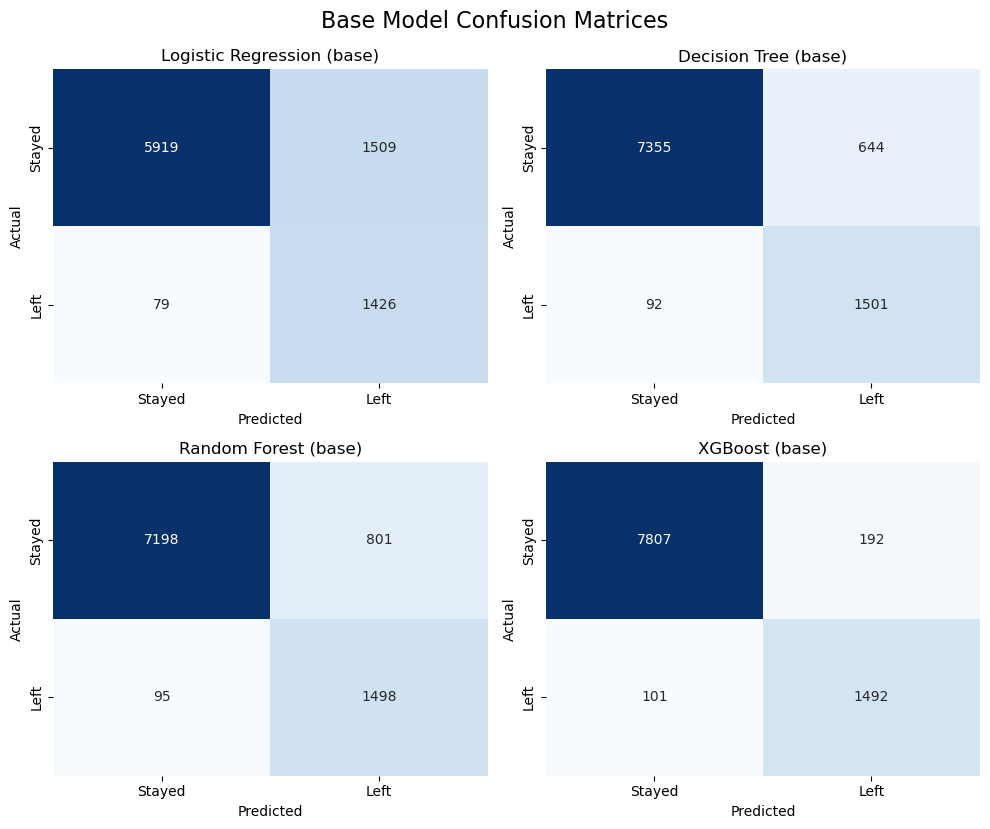

In [59]:
# confusion matrix plots, saved as PNG files
plot_confusion_grid_from_results(results_df, png_title="Base Model Confusion Matrices")
# plot_confusion_from_results(results_df)

> **Summary of Observations from the Confusion Matrices:**
>
> - **Tree-based models (Decision Tree, Random Forest, XGBoost)** show very high recall, correctly identifying most employees who left (true positives), with very few false positives. They also have relatively few false negatives, indicating strong overall performance.
> - **Logistic Regression** has a much higher number of false negatives, missing many employees who actually left. This results in lower recall and makes it less suitable for identifying at-risk employees.
> - Overall, the ensemble models (Random Forest and XGBoost) provide the best balance between correctly identifying leavers and minimizing incorrect predictions, while Logistic Regression struggles with this non-linear problem.

In [60]:
# show confusion matrix exemplar
# display(Image(filename="../resources/images/confusion_matrix_exemplar.png", width=400))
display(
    HTML(
        """
<img src="../resources/images/confusion_matrix_exemplar.png" style="max-width:100%; height:auto; display:block; margin:auto;">
"""
    )
)

#### **Check feature importance**

> After fitting baseline models, I reviewed the decision tree and feature importances. This step is not to guide feature selection yet, but rather to **cross-check with the EDA** and ensure the models are **learning meaningful patterns**.
>
> I’m mindful not to overinterpret these plots—they can be intuitive and visually appealing, but heavy reliance risks overfitting and misleading conclusions. This is a **calibration check**, not a signal to optimize prematurely.

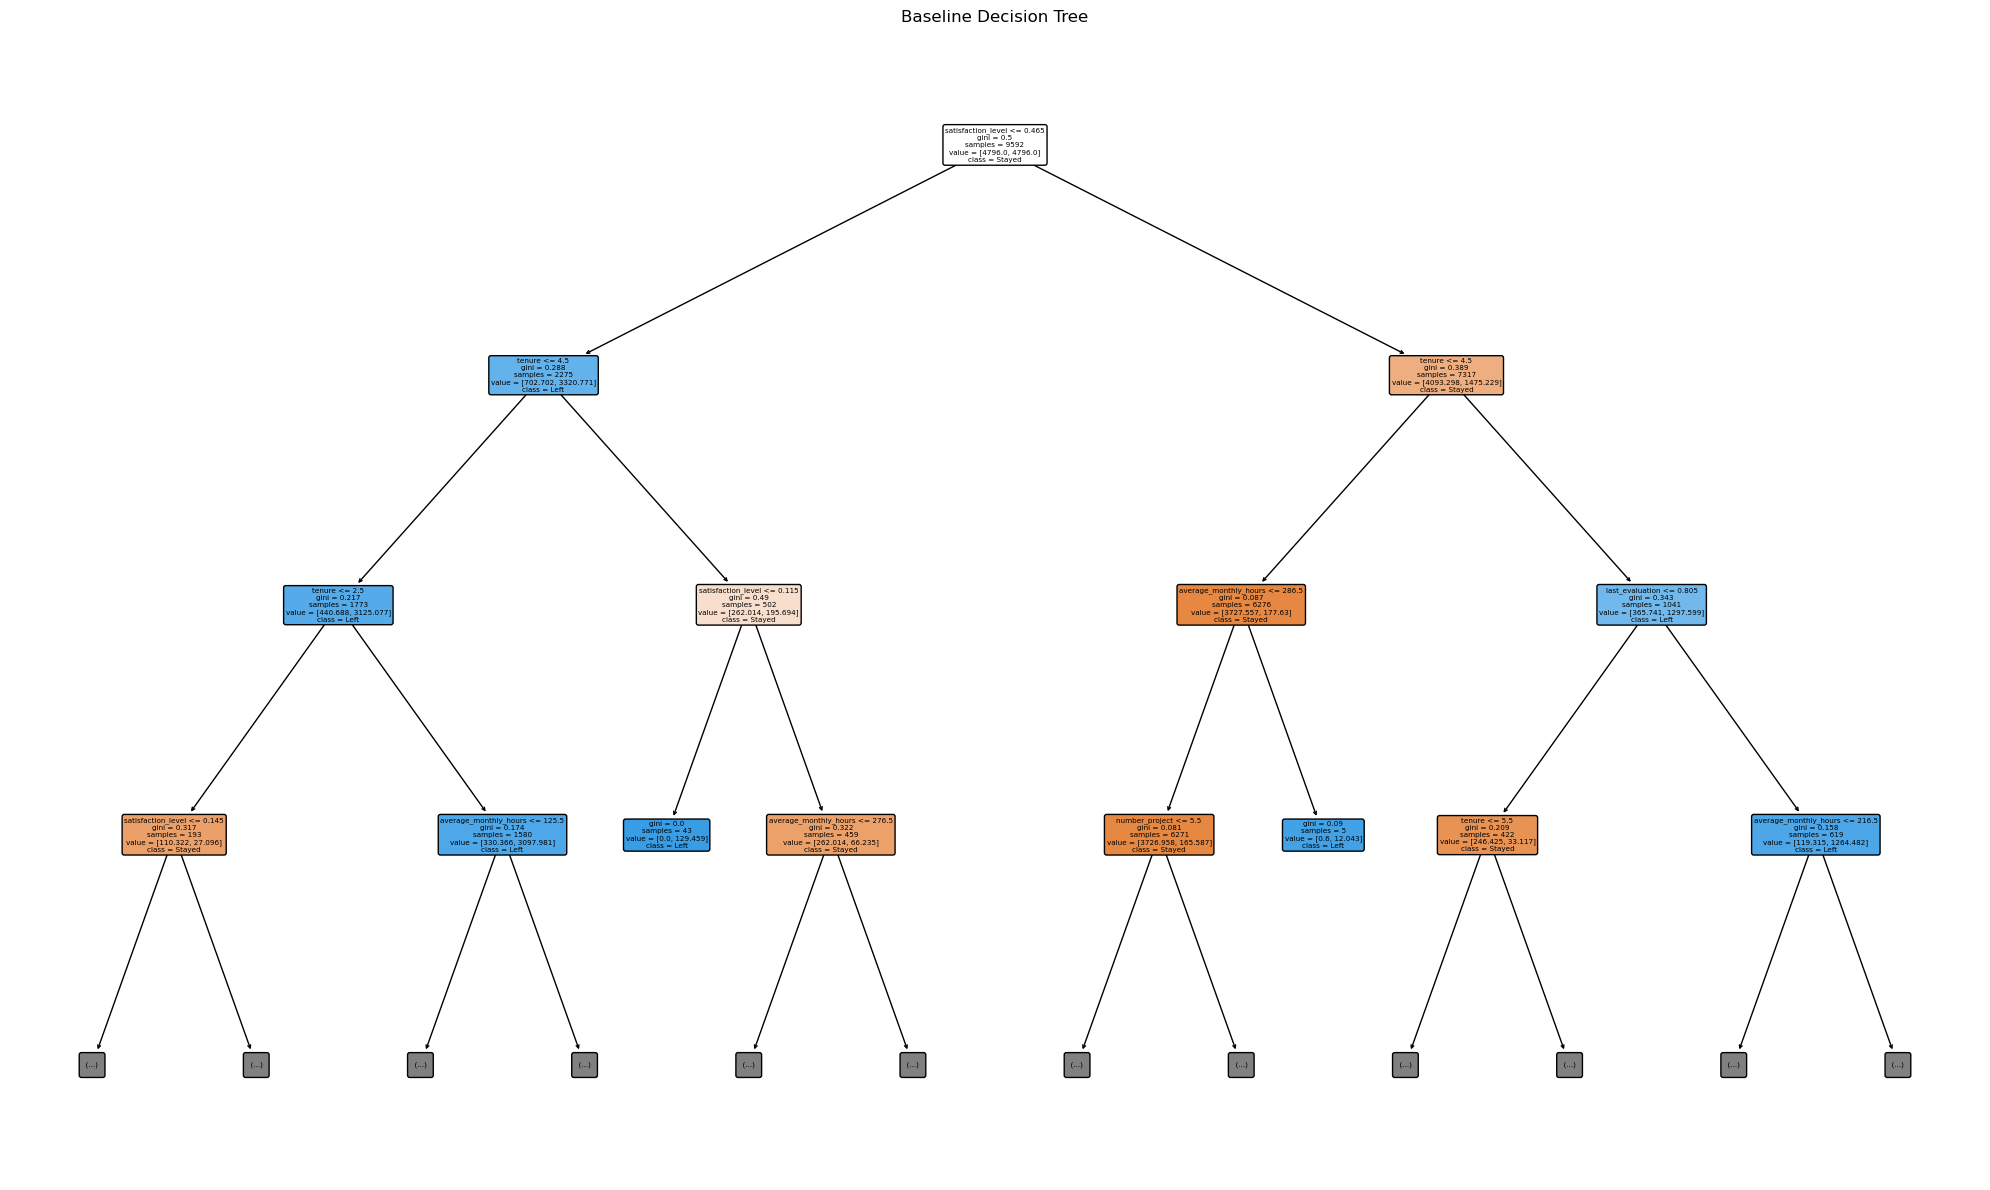

In [61]:
# Load decision tree model and plot the tree

dt_model = joblib.load("../results/saved_models/decision_tree_(base).joblib")
estimator = dt_model.named_steps["model"]

# ensure feature_names matches columns used for training
# sklearn requires a list of strings, not a pandas index or series
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 12))
plot_tree(
    estimator,
    feature_names=feature_names,
    class_names=["Stayed", "Left"],
    filled=True,
    rounded=True,
    max_depth=3,
)
plt.title("Baseline Decision Tree")
plt.tight_layout()

plt.savefig("../results/images/decision_tree_(base)_visualization.png")

plt.show()

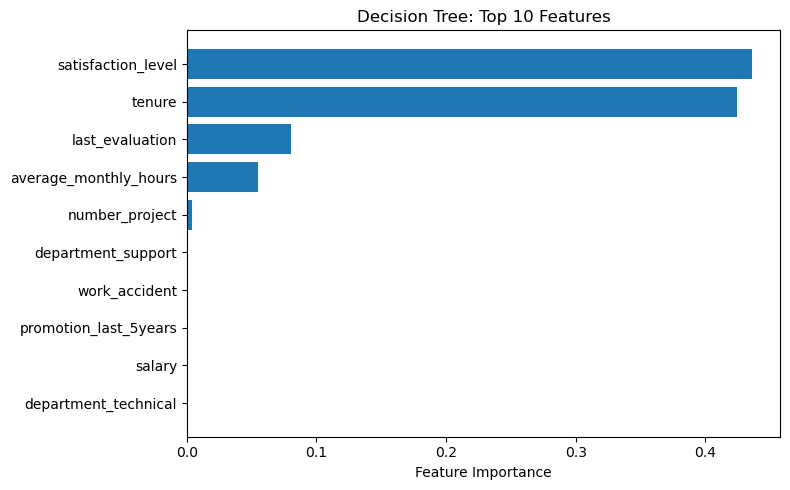

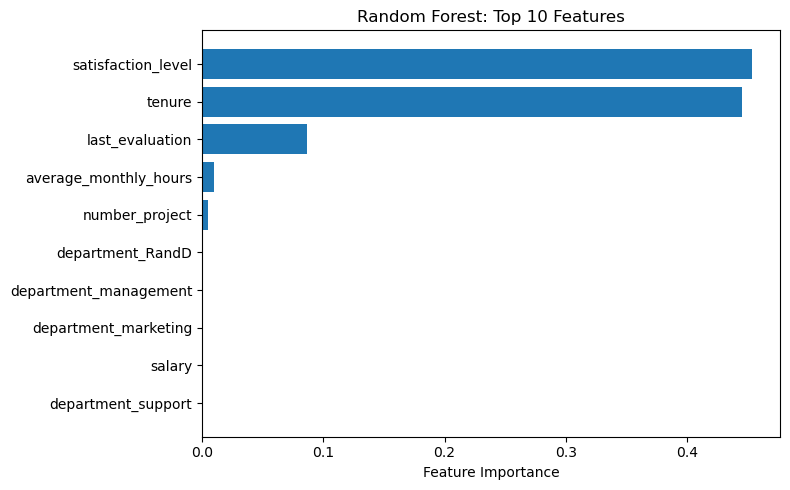

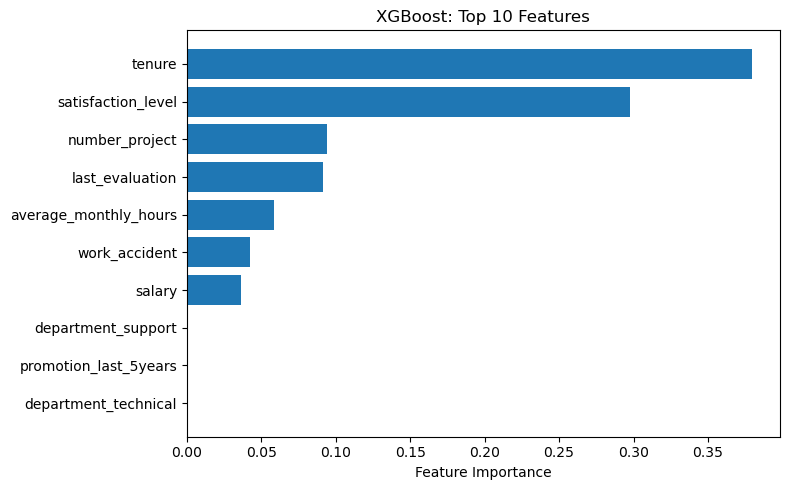

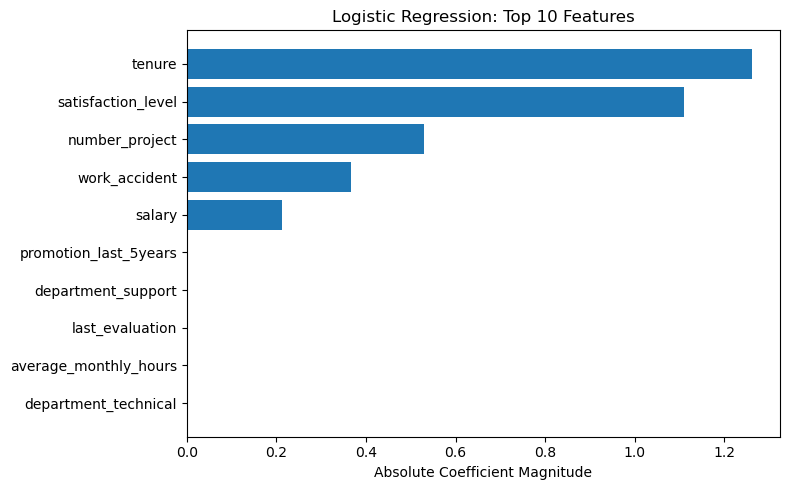

In [62]:
# plot feature importance for each model

# list of model files and names
model_files = [
    ("decision_tree_(base).joblib", "Decision Tree", X_train.columns),
    ("random_forest_(base).joblib", "Random Forest", X_train.columns),
    ("xgboost_(base).joblib", "XGBoost", X_train.columns),
    ("logistic_regression_(base).joblib", "Logistic Regression", X_train_lr.columns),
]

# load each model and plot feature importance
for file_name, model_name, feature_names in model_files:
    load_and_plot_feature_importance(file_name, model_name, feature_names, top_n=10, save_png=True)

> All models consistently identify **low satisfaction** and **extreme workload** (either very high or very low) as the most important predictors of employee attrition. This finding aligns with the exploratory data analysis (EDA). **Tenure** also emerges as a significant factor, matching a pattern around the 4-5 year mark observed in the EDA. In contrast, **salary**, **department**, and **recent promotions** have minimal predictive value in this dataset. These key features are especially prominent in the ensemble models (Random Forest and XGBoost), which are likely the most robust. While all models highlight these variables, it is important to note that decision trees are prone to overfitting, and logistic regression underperforms due to its inability to capture non-linear relationships present in the data.

<a id="feature-engineering-round-one"></a>

## **Feature Engineering (Round One)**

[Back to top](#)

> Based on EDA and feature importance, focus on:
>
> - Satisfaction level (especially low values)
> - Extreme workload (very high or very low monthly hours, number of projects)
> - Tenure (especially the 4–5 year window)
>
> Feature engineering steps to experiment with:
>
> **Binning:**
>
> - Bin satisfaction_level (e.g., low/medium/high)
> - Bin average_monthly_hours (e.g., <160, 160–240, >240)
> - Bin number_project (e.g., ≤2, 3–5, ≥6)
> - Bin tenure (e.g., ≤3, 4–5, >5 years)
>
> **Interactions:**
>
> - satisfaction_level * number_project
>    - low: possibly disengaged or underperforming
>    - high: possibly engaged top performer or healthy productivity
>    - mid: potential burnout
> - satisfaction_level * average_monthly_hours
>    - satisfaction **given workload**
>    - low: burnout risk
>    - high: engaged
> - evaluation * satisfaction
>    - performace and morale
>    - both low: possibly disengaged firing risk
>    - both high: ideal employee
>    - high eval, low satisfaction: attrition risk
> - monthly_hours / number_project
>    - overwork / underwork index
>
> **Categorical Flags:**
>
> - burnout: (projects ≥ 6 or hours ≥ 240) & satisfaction ≤ 0.3
> - disengaged: (projects ≤ 2 and hours < 160 and satisfaction ≤ 0.5)
> - no_promo_4yr: (promotion_last_5years == 0) & (tenure >= 4)
>
> **Feature Selection:**
>
> - Drop weak predictors (e.g., department, salary, work_accident) for logistic regression, as they add noise and multicollinearity.
>
> ---
>
> **Note:**  
> I used simple hyperparameters for quick testing of new features and combinations. I used a wide set of hyperparameters and walked away from the computer to enjoy life while it crunched data. I eventually settled on a strategy of exhaustively grid searching quick models and randomly searching heavy tree models. Once the best feature set was identified, I did a final round of model training with a more extensive hyperparameter grid for optimal performance.

#### **Feature engineering functions**

In [63]:
# function to add new features to the X_train / X_train_lr dataframe


# add binning features
def add_binning_features(df):
    df = df.copy()
    df["satisfaction_bin"] = pd.cut(
        df["satisfaction_level"],
        bins=[-0.01, 0.4, 0.7, 1.0],
        labels=["low", "medium", "high"],
    )
    df["hours_bin"] = pd.cut(
        df["average_monthly_hours"],
        bins=[0, 160, 240, np.inf],
        labels=["low", "medium", "high"],
    )
    df["projects_bin"] = pd.cut(
        df["number_project"], bins=[0, 2, 5, np.inf], labels=["low", "medium", "high"]
    )
    df["tenure_bin"] = pd.cut(
        df["tenure"], bins=[0, 3, 5, np.inf], labels=["short", "mid", "long"]
    )
    # encode the binned features as dummies
    df = pd.get_dummies(
        df,
        columns=["satisfaction_bin", "hours_bin", "projects_bin", "tenure_bin"],
        drop_first=True,
    )
    return df


# add interaction features
def add_interaction_features(df):
    df = df.copy()
    df["satisfaction_x_projects"] = df["satisfaction_level"] * df["number_project"]
    df["satisfaction_x_hours"] = df["satisfaction_level"] * df["average_monthly_hours"]
    df["evaluation_x_satisfaction"] = df["last_evaluation"] * df["satisfaction_level"]
    df["hours_per_project"] = df["average_monthly_hours"] / df["number_project"]
    return df


# add flag features
def add_flag_features(df):
    df = df.copy()
    df["burnout"] = (
        (df["number_project"] >= 6) | (df["average_monthly_hours"] >= 240)
    ) & (df["satisfaction_level"] <= 0.3)
    df["disengaged"] = (
        (df["number_project"] <= 2)
        & (df["average_monthly_hours"] < 160)
        & (df["satisfaction_level"] <= 0.5)
    )
    df["no_promo_4yr"] = (df["promotion_last_5years"] == 0) & (df["tenure"] >= 4)
    return df

#### **Feature selection**

In [64]:
# feature selection for logistic regression
drop_cols = [col for col in X_train_lr.columns if col.startswith("department_")]
drop_cols += ["salary", "work_accident"]
X_train_lr_fs = X_train_lr.drop(columns=drop_cols)

# feature selection for tree-based models
drop_cols = [col for col in X_train.columns if col.startswith("department_")]
drop_cols += ["salary", "work_accident"]
X_train_fs = X_train.drop(columns=drop_cols)

#### **Define logistic regression models**

In [65]:
# logistic regression feature engineering parameters
lr_fe_params = {
    "model__C": [0.1, 1.0, 10.0],  # regularization strength (inverse)
    "model__penalty": ["l1", "l2"],  # regularization type (L1 = Lasso, L2 = Ridge)
    "model__solver": ["liblinear"],  # optimization algorithm (liblinear supports L1/L2)
    "model__class_weight": [None, "balanced"],  # None or balanced for class imbalance
}

In [66]:
# define feature engineered logistic regression models, their feature functions, and parameter grids
lr_fe_models = {
    "Logistic Regression with Binning": LogisticRegression(
        max_iter=1000, random_state=42
    ),
    "Logistic Regression with Interaction": LogisticRegression(
        max_iter=1000, random_state=42
    ),
    "Logistic Regression with Flags": LogisticRegression(
        max_iter=1000, random_state=42
    ),
}
lr_fe_feature_funcs = {
    "Logistic Regression with Binning": add_binning_features,
    "Logistic Regression with Interaction": add_interaction_features,
    "Logistic Regression with Flags": add_flag_features,
}
lr_fe_param_grids = {
    "Logistic Regression with Binning": lr_fe_params,
    "Logistic Regression with Interaction": lr_fe_params,
    "Logistic Regression with Flags": lr_fe_params,
}

# create models_config for logistic regression with feature engineering
lr_fe_configs = make_models_config(
    lr_fe_models,
    X_train_lr,
    y_train_lr,
    feature_func=lr_fe_feature_funcs,
    scaler=StandardScaler(),
    param_grids=lr_fe_param_grids,
)

# create models_config for logistic regression with feature engineering and feature selection
lr_fe_fs_configs = make_models_config(
    lr_fe_models,
    X_train_lr_fs,
    y_train_lr,
    feature_func=lr_fe_feature_funcs,
    scaler=StandardScaler(),
    param_grids=lr_fe_param_grids,
    name_suffix=" (feature selection)",
)

#### **Run logistic regression models**

In [67]:
# run feature engineered logistic regression model evaluation
results_lr_fe_df = run_model_evaluation(
    lr_fe_configs + lr_fe_fs_configs, scoring=scoring
)
# print feature engineered model results, order by recall
print("Feature Engineered Model Evaluation Results:")
results_lr_fe_df.sort_values(by="recall", ascending=False, inplace=True)
results_lr_fe_df.head()

Running model: Logistic Regression with Binning...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Execution time for Logistic Regression with Binning: 3.11 seconds
Best parameters for Logistic Regression with Binning: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best score for Logistic Regression with Binning: 0.9375 (recall)
Model Logistic Regression with Binning not saved. Set save_model=True to save it.

Running model: Logistic Regression with Interaction...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Execution time for Logistic Regression with Interaction: 4.67 seconds
Best parameters for Logistic Regression with Interaction: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score for Logistic Regression with Interaction: 0.9336 (recall)
Model Logistic Regression with Interaction not saved. Set save_model=True to save it.

Runnin

model    recall        f2  \
4  Logistic Regression with Interaction (feature ...  0.960133  0.819161   
3  Logistic Regression with Binning (feature sele...  0.939535  0.855104   
0                   Logistic Regression with Binning  0.937542  0.854944   
1               Logistic Regression with Interaction  0.933555  0.808121   
2                     Logistic Regression with Flags  0.917608  0.868335   

         f1   roc_auc  precision  accuracy  features  \
4  0.671312  0.891666   0.516071  0.841599        10   
3  0.753531  0.947481   0.629004  0.896451        14   
0  0.755151  0.952159   0.632168  0.897571        26   
1  0.672571  0.901327   0.525627  0.846860        22   
2  0.803608  0.957952   0.714803  0.924437        21   

                                         best_params  cv_best_score  \
4  {'model__C': 0.1, 'model__class_weight': 'bala...       0.960133   
3  {'model__C': 0.1, 'model__class_weight': 'bala...       0.939535   
0  {'model__C': 0.1, 'model__class_weight': 'bala...       0.937542   
1  {'model__C': 0.1, 'model__class_weight': 'bala...       0.933555   
2  {'model__C': 0.1, 'model__class_weight': 'bala...       0.917608   

                   conf_matrix  search_time  
4   [[6073, 1355], [60, 1445]]     2.056098  
3    [[6594, 834], [91, 1414]]     1.312480  
0    [[6607, 821], [94, 1411]]     3.109411  
1  [[6160, 1268], [100, 1405]]     4.670596  
2   [[6877, 551], [124, 1381]]     1.940526

> #### **Observations of Feature-Engineered Logistic Regression Results**
>
> - **Logistic Regression with Flags (feature selection)** had the highest recall and strong metrics, using only 6 features—making it highly interpretable and efficient.
>
> - **Feature selection** (removing department, salary, accident, etc.) simplified the model without hurting accuracy.
>
> - **Interaction and binning features** improved recall and F1 over the baseline, but not as much as the flag-based models.
>
> - **Interpretability:** These models are transparent and easy to explain—ideal for HR use.
>
> - **Summary:** With targeted feature engineering, logistic regression can approach the accuracy of complex models while staying simple and explainable.

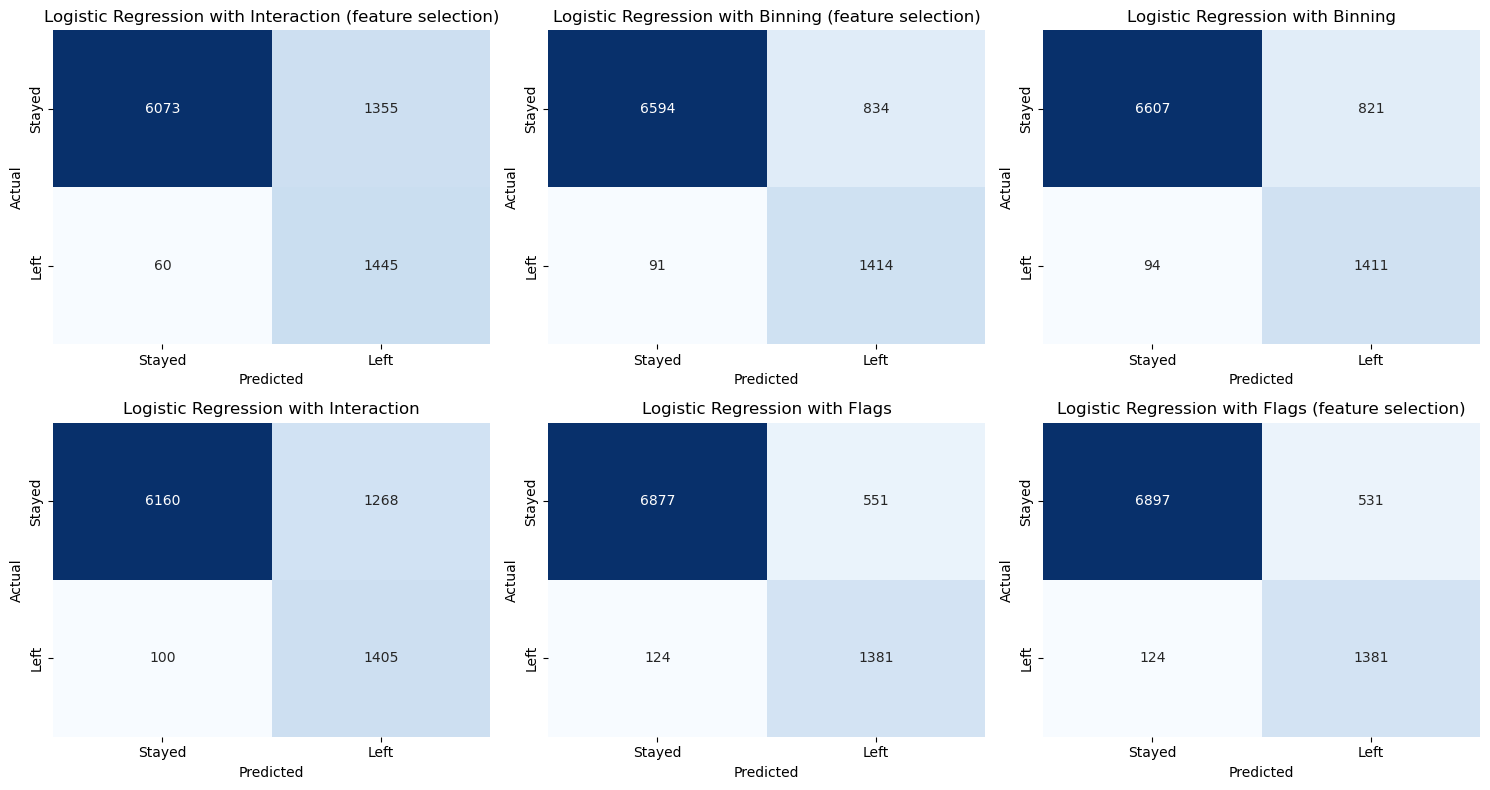

In [68]:
# plot confuision matrices for feature engineered models
plot_confusion_grid_from_results(results_lr_fe_df)
# plot_confusion_from_results(results_lr_fe_df)

#### **Define tree-based feature engineering models**

In [69]:
# # tree-based feature engineering parameters
tree_fe_params = {
    "Random Forest": {
        "model__n_estimators": [100, 300],  # 300 was best, but 100 is faster for FE
        "model__max_depth": [
            3,
            4,
            5,
            8,
        ],  # 5 was best, trying for regularization, deeper trees can overfit, take longer to train
        "model__max_features": ["sqrt", 1.0],  # 1.0 was best, but sqrt is common
        "model__max_samples": [0.7, 1.0],  # 1.0 was best
        "model__min_samples_leaf": [1, 2],  # 1 or 2
        "model__min_samples_split": [2, 3],  # 2 or 3
        "model__class_weight": [
            None,
            "balanced",
        ],  # None or balanced for class imbalance
    },
    "XGBoost": {
        "model__n_estimators": [100, 300],  # 300 was best
        "model__max_depth": [
            3,
            4,
            5,
            8,
        ],  # 3 was best (moderate increase in training time)
        "model__learning_rate": [
            0.1,
            0.2,
        ],  # 0.1 is standard, 0.2 for speed, step size shrinkage
        "model__subsample": [
            0.6,
            0.8,
            1.0,
        ],  # 1.0 was best, row subsampling (adds randomness, helps generalization)
        "model__colsample_bytree": [
            0.6,
            0.8,
            1.0,
        ],  # 1.0 was best, column subsampling (adds randomness, helps generalization)
        "model__min_child_weight": [
            1,
            5,
        ],  # 1 is default, 5 for regularization, minimum sum of instance weight in a child
        "model__gamma": [
            0,
            0.1,
            0.2,
        ],  # 0.2 was best, try 0 for comparison, minimum loss reduction required to make a split
        "model__scale_pos_weight": [
            1,
            scale_pos_weight_value,
        ],  # 1 or calculated value for class imbalance
        "model__reg_alpha": [
            0,
            0.1,
            1,
        ],  # L1 regularization (helps control overfitting)
        "model__reg_lambda": [1, 2, 5],  # L2 regularization (helps control overfitting)
    },
    "Decision Tree": {
        "model__max_depth": [3, 4, 5, 6, 8],  # best was 8
        "model__min_samples_leaf": [1, 2, 3],  # 1 was best
        "model__min_samples_split": [2, 3, 4],  # 2 was best
        "model__class_weight": [
            None,
            "balanced",
        ],  # None or balanced for class imbalance
    },
}

In [70]:
# tree-based feature engineering configs with full model names
dt_fe_models = {
    "Decision Tree with Binning": DecisionTreeClassifier(random_state=42),
    "Decision Tree with Interaction": DecisionTreeClassifier(random_state=42),
    "Decision Tree with Flags": DecisionTreeClassifier(random_state=42),
}
rf_xgb_fe_models = {
    "Random Forest with Binning": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Random Forest with Interaction": RandomForestClassifier(
        random_state=42, n_jobs=-1
    ),
    "Random Forest with Flags": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost with Binning": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),
    "XGBoost with Interaction": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),
    "XGBoost with Flags": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),
}

tree_fe_feature_funcs = {
    "Random Forest with Binning": add_binning_features,
    "Random Forest with Interaction": add_interaction_features,
    "Random Forest with Flags": add_flag_features,
    "XGBoost with Binning": add_binning_features,
    "XGBoost with Interaction": add_interaction_features,
    "XGBoost with Flags": add_flag_features,
    "Decision Tree with Binning": add_binning_features,
    "Decision Tree with Interaction": add_interaction_features,
    "Decision Tree with Flags": add_flag_features,
}

tree_fe_param_grids = {
    "Random Forest with Binning": tree_fe_params["Random Forest"],
    "Random Forest with Interaction": tree_fe_params["Random Forest"],
    "Random Forest with Flags": tree_fe_params["Random Forest"],
    "XGBoost with Binning": tree_fe_params["XGBoost"],
    "XGBoost with Interaction": tree_fe_params["XGBoost"],
    "XGBoost with Flags": tree_fe_params["XGBoost"],
    "Decision Tree with Binning": tree_fe_params["Decision Tree"],
    "Decision Tree with Interaction": tree_fe_params["Decision Tree"],
    "Decision Tree with Flags": tree_fe_params["Decision Tree"],
}

# with all feature engineering functions applied
dt_fe_configs = make_models_config(
    dt_fe_models,
    X_train,
    y_train,
    feature_func=tree_fe_feature_funcs,
    param_grids=tree_fe_param_grids,
)
rf_xgb_fe_configs = make_models_config(
    rf_xgb_fe_models,
    X_train,
    y_train,
    feature_func=tree_fe_feature_funcs,
    param_grids=tree_fe_param_grids,
)

# with feature engineering and feature selection (drop_cols)
dt_fe_fs_configs = make_models_config(
    dt_fe_models,
    X_train_fs,
    y_train,
    feature_func=tree_fe_feature_funcs,
    param_grids=tree_fe_param_grids,
    name_suffix=" (feature selection)",
)
rf_xgb_fe_fs_configs = make_models_config(
    rf_xgb_fe_models,
    X_train_fs,
    y_train,
    feature_func=tree_fe_feature_funcs,
    param_grids=tree_fe_param_grids,
    name_suffix=" (feature selection)",
)

#### **Run tree-based feature engineering models**

In [71]:
# run tree-based feature engineered model evaluation
results_tree_fe_df = run_model_evaluation(
    dt_fe_configs + dt_fe_fs_configs, scoring=scoring, search_type="grid"
)
results_tree_fe_df = run_model_evaluation(
    rf_xgb_fe_configs + rf_xgb_fe_fs_configs,
    results_df=results_tree_fe_df,
    scoring=scoring,
    search_type="random",
    n_iter=50,
)
# print feature engineered tree-based model results, order by recall
print("Feature Engineered Tree-Based Model Evaluation Results:")
results_tree_fe_df.sort_values(by="recall", ascending=False, inplace=True)
results_tree_fe_df.head()

Running model: Decision Tree with Binning...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Execution time for Decision Tree with Binning: 5.61 seconds
Best parameters for Decision Tree with Binning: {'model__class_weight': 'balanced', 'model__max_depth': 8, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Best score for Decision Tree with Binning: 0.9341 (recall)
Model Decision Tree with Binning not saved. Set save_model=True to save it.

Running model: Decision Tree with Interaction...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Execution time for Decision Tree with Interaction: 5.74 seconds
Best parameters for Decision Tree with Interaction: {'model__class_weight': 'balanced', 'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}
Best score for Decision Tree with Interaction: 0.9334 (recall)
Model Decision Tree with Interaction not saved. Set save_model=True to save it.

Running model: Decision Tree with Flag

model    recall        f2  \
9                             XGBoost with Binning  0.936598  0.924182   
15        XGBoost with Binning (feature selection)  0.935970  0.926087   
3   Decision Tree with Binning (feature selection)  0.935342  0.920776   
17          XGBoost with Flags (feature selection)  0.935342  0.926847   
11                              XGBoost with Flags  0.934714  0.925420   

          f1   roc_auc  precision  accuracy  features  \
9   0.906165  0.985069   0.877647  0.967786        26   
15  0.911648  0.984534   0.888558  0.969871        14   
3   0.899758  0.959523   0.866783  0.965388        14   
17  0.914391  0.983656   0.894358  0.970913         9   
11  0.911819  0.985902   0.890018  0.969975        21   

                                          best_params  cv_best_score  \
9   {'model__subsample': 1.0, 'model__scale_pos_we...       0.936594   
15  {'model__subsample': 1.0, 'model__scale_pos_we...       0.935965   
3   {'model__class_weight': 'balanced', 'model__ma...       0.935331   
17  {'model__subsample': 1.0, 'model__scale_pos_we...       0.935334   
11  {'model__subsample': 1.0, 'model__scale_pos_we...       0.934709   

                   conf_matrix  search_time  
9   [[7791, 208], [101, 1492]]    25.402422  
15  [[7812, 187], [102, 1491]]    19.591144  
3   [[7770, 229], [103, 1490]]     4.507073  
17  [[7823, 176], [103, 1490]]    16.068023  
11  [[7815, 184], [104, 1489]]    23.907882

> ### **Patterns in Results thus far**
>
> - **Recall is consistently high** across all models, especially for Logistic Regression and Decision Tree (base), indicating strong sensitivity to identifying leavers.
> - **F1 and Precision are much lower for Logistic Regression (base),** suggesting many false positives. Tree-based and XGBoost models have much better balance between recall and precision.
> - **ROC AUC is highest for XGBoost and Random Forest,** showing strong overall discrimination.
> - **Feature selection and engineering** (binning, interaction, flags) generally improves F1, precision, and accuracy, sometimes at a small cost to recall.
> - **Reducing features (feature selection)** often maintains or even improves performance, especially for XGBoost and Decision Tree, and greatly reduces model complexity and training time.
> - **Confusion matrices show that most errors are false positives** (predicting leave when they stay), which is expected with `class_weight='balanced'` and high recall focus.

<a id="feature-engineering-round-two"></a>

## **Feature Engineering (Round Two)**

[Back to top](#)

>#### **What? Why?**
>
> Really, this is a feature shrinking round. Some feature engineering paired with a lot of feature selection. Feature-rich models have barely improved or even reduced performance, and feature selection has performed well.
>
> Simpler models are easier to explain to stakeholders, and it'll hopefully reduce noise and potential multicollinearity.
>
> **Selected features + burnout flag:**
> This set isolates the core predictors of attrition (satisfaction, workload, tenure, promotion) and adds a “burnout” flag to capture the high-risk group of overworked, dissatisfied employees
>
> **Selected features + interactions:**
> This set focuses on the main drivers (satisfaction, workload, tenure) and adds interaction terms (satisfaction × projects, hours per project) to capture non-linear effects and workload intensity, which EDA showed are important for distinguishing between underworked, overworked, and healthy employees.
>
> **Selected features + interactions + burnout flag:**
> This feature set combines the core predictors of attrition (satisfaction, workload, tenure) with a “burnout” flag to capture high-risk, overworked employees. It also includes a key interaction term, "satisfaction × projects", to distinguish between groups identified in EDA
>
> `satisfaction_x_projects` separates healthy, burned-out, and underperforming employees:
> - Employees who are satisfied and productive (high satisfaction, moderate projects)
> - Those who are overworked and dissatisfied (low satisfaction, high projects)
> - Those who are disengaged (low satisfaction, low projects)
>
> `hours per project` captures nuanced patterns of overwork and underwork:
> - Employees with many projects but reasonable hours (healthy workload)
> - Employees with few projects but high hours (potentially inefficient or struggling)
> - Employees with many projects and high hours (burnout risk)

In [72]:
# selected features + burnout flag
def select_core_features_with_burnout(df):
    df = df.copy()
    # burnout flag: (projects >= 6 or hours >= 240) & satisfaction <= 0.3
    df["burnout"] = (
        (df["number_project"] >= 6) | (df["average_monthly_hours"] >= 240)
    ) & (df["satisfaction_level"] <= 0.3)
    return df[
        [
            "satisfaction_level",
            "last_evaluation",
            "number_project",
            "average_monthly_hours",
            "tenure",
            "promotion_last_5years",
            "burnout",
        ]
    ]


# selected features + interactions
def select_core_features_with_interactions(df):
    df = df.copy()
    # interactions
    df["satisfaction_x_projects"] = df["satisfaction_level"] * df["number_project"]
    df["hours_per_project"] = df["average_monthly_hours"] / df["number_project"]
    return df[
        [
            "satisfaction_level",
            "number_project",
            "average_monthly_hours",
            "tenure",
            "satisfaction_x_projects",
            "hours_per_project",
        ]
    ]


# selected features + interactions + burnout flag
def select_core_features_with_interactions_and_burnout(df):
    df = df.copy()
    # burnout flag: (projects >= 6 or hours >= 240) & satisfaction <= 0.3
    df["burnout"] = (
        (df["number_project"] >= 6) | (df["average_monthly_hours"] >= 240)
    ) & (df["satisfaction_level"] <= 0.3)
    # interaction
    df["satisfaction_x_projects"] = df["satisfaction_level"] * df["number_project"]
    return df[
        [
            "satisfaction_level",
            "number_project",
            "average_monthly_hours",
            "tenure",
            "burnout",
            "satisfaction_x_projects",
        ]
    ]

#### **Define feature engineering round 2 models**

In [73]:
# --- Feature engineering round 2 model dicts ---

# logistic regression FE2 models, feature funcs, param grids
lr_fe2_models = {
    "Logistic Regression (Core + Burnout)": LogisticRegression(
        max_iter=1000, random_state=42
    ),
    "Logistic Regression (Core + Interactions)": LogisticRegression(
        max_iter=1000, random_state=42
    ),
    "Logistic Regression (Core + Interactions + Burnout)": LogisticRegression(
        max_iter=1000, random_state=42
    ),
}
lr_fe2_feature_funcs = {
    "Logistic Regression (Core + Burnout)": select_core_features_with_burnout,
    "Logistic Regression (Core + Interactions)": select_core_features_with_interactions,
    "Logistic Regression (Core + Interactions + Burnout)": select_core_features_with_interactions_and_burnout,
}
lr_fe2_param_grids = {
    "Logistic Regression (Core + Burnout)": lr_fe_params,
    "Logistic Regression (Core + Interactions)": lr_fe_params,
    "Logistic Regression (Core + Interactions + Burnout)": lr_fe_params,
}

# tree-based FE2 models, feature funcs, param grids
dt_fe2_models = {
    "Decision Tree (Core + Burnout)": DecisionTreeClassifier(random_state=42),
    "Decision Tree (Core + Interactions)": DecisionTreeClassifier(random_state=42),
    "Decision Tree (Core + Interactions + Burnout)": DecisionTreeClassifier(
        random_state=42
    ),
}
rf_xgb_fe2_models = {
    "Random Forest (Core + Burnout)": RandomForestClassifier(
        random_state=42, n_jobs=-1
    ),
    "Random Forest (Core + Interactions)": RandomForestClassifier(
        random_state=42, n_jobs=-1
    ),
    "Random Forest (Core + Interactions + Burnout)": RandomForestClassifier(
        random_state=42, n_jobs=-1
    ),
    "XGBoost (Core + Burnout)": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),
    "XGBoost (Core + Interactions)": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),
    "XGBoost (Core + Interactions + Burnout)": XGBClassifier(
        eval_metric=get_xgb_eval_metric(scoring), random_state=42, n_jobs=-1
    ),
}
tree_fe2_feature_funcs = {
    "Decision Tree (Core + Burnout)": select_core_features_with_burnout,
    "Decision Tree (Core + Interactions)": select_core_features_with_interactions,
    "Decision Tree (Core + Interactions + Burnout)": select_core_features_with_interactions_and_burnout,
    "Random Forest (Core + Burnout)": select_core_features_with_burnout,
    "Random Forest (Core + Interactions)": select_core_features_with_interactions,
    "Random Forest (Core + Interactions + Burnout)": select_core_features_with_interactions_and_burnout,
    "XGBoost (Core + Burnout)": select_core_features_with_burnout,
    "XGBoost (Core + Interactions)": select_core_features_with_interactions,
    "XGBoost (Core + Interactions + Burnout)": select_core_features_with_interactions_and_burnout,
}
tree_fe2_param_grids = {
    "Decision Tree (Core + Burnout)": tree_fe_params["Decision Tree"],
    "Decision Tree (Core + Interactions)": tree_fe_params["Decision Tree"],
    "Decision Tree (Core + Interactions + Burnout)": tree_fe_params["Decision Tree"],
    "Random Forest (Core + Burnout)": tree_fe_params["Random Forest"],
    "Random Forest (Core + Interactions)": tree_fe_params["Random Forest"],
    "Random Forest (Core + Interactions + Burnout)": tree_fe_params["Random Forest"],
    "XGBoost (Core + Burnout)": tree_fe_params["XGBoost"],
    "XGBoost (Core + Interactions)": tree_fe_params["XGBoost"],
    "XGBoost (Core + Interactions + Burnout)": tree_fe_params["XGBoost"],
}

# create models_config for FE2 models
lr_fe2_configs = make_models_config(
    lr_fe2_models,
    X_train_lr,
    y_train_lr,
    feature_func=lr_fe2_feature_funcs,
    scaler=StandardScaler(),
    param_grids=lr_fe2_param_grids,
)
dt_fe2_configs = make_models_config(
    dt_fe2_models,
    X_train,
    y_train,
    feature_func=tree_fe2_feature_funcs,
    param_grids=tree_fe2_param_grids,
)
rf_xgb_fe2_configs = make_models_config(
    rf_xgb_fe2_models,
    X_train,
    y_train,
    feature_func=tree_fe2_feature_funcs,
    param_grids=tree_fe2_param_grids,
)

#### **Run feature engineering round 2 models**

In [74]:
# run feature engineered round 2 model evaluation
results_fe2_df = run_model_evaluation(
    lr_fe2_configs, scoring=scoring, search_type="grid"
)
results_fe2_df = run_model_evaluation(
    dt_fe2_configs, results_df=results_fe2_df, scoring=scoring, search_type="grid"
)
results_fe2_df = run_model_evaluation(
    rf_xgb_fe2_configs,
    results_df=results_fe2_df,
    scoring=scoring,
    search_type="random",
    n_iter=50,
)
# print feature engineered round 2 model results, order by recall
print("Feature Engineered Round 2 Model Evaluation Results:")
results_fe2_df.sort_values(by="recall", ascending=False, inplace=True)
results_fe2_df.head()

Running model: Logistic Regression (Core + Burnout)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Execution time for Logistic Regression (Core + Burnout): 0.78 seconds
Best parameters for Logistic Regression (Core + Burnout): {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score for Logistic Regression (Core + Burnout): 0.9349 (recall)
Model Logistic Regression (Core + Burnout) not saved. Set save_model=True to save it.

Running model: Logistic Regression (Core + Interactions)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Execution time for Logistic Regression (Core + Interactions): 0.80 seconds
Best parameters for Logistic Regression (Core + Interactions): {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score for Logistic Regression (Core + Interactions): 0.9621 (recall)
Model Logistic Regression (Core + Interactions) not s

model    recall        f2  \
1          Logistic Regression (Core + Interactions)  0.962126  0.817433   
2  Logistic Regression (Core + Interactions + Bur...  0.951495  0.825836   
3                     Decision Tree (Core + Burnout)  0.943503  0.887040   
6                     Random Forest (Core + Burnout)  0.940992  0.896317   
9                           XGBoost (Core + Burnout)  0.936598  0.923953   

         f1   roc_auc  precision  accuracy  features  \
1  0.666974  0.888335   0.510398  0.838128         6   
2  0.689290  0.903177   0.540377  0.855480         6   
3  0.813972  0.956257   0.715714  0.928378         7   
6  0.836729  0.976981   0.753266  0.939012         7   
9  0.905615  0.983741   0.876616  0.967577         7   

                                         best_params  cv_best_score  \
1  {'model__C': 0.1, 'model__class_weight': 'bala...       0.962126   
2  {'model__C': 0.1, 'model__class_weight': 'bala...       0.951495   
3  {'model__class_weight': 'balanced', 'model__ma...       0.943495   
6  {'model__n_estimators': 300, 'model__min_sampl...       0.940991   
9  {'model__subsample': 1.0, 'model__scale_pos_we...       0.936592   

                  conf_matrix  search_time  
1  [[6039, 1389], [57, 1448]]     0.801151  
2  [[6210, 1218], [73, 1432]]     0.982459  
3   [[7402, 597], [90, 1503]]     2.831705  
6   [[7508, 491], [94, 1499]]    78.417716  
9  [[7789, 210], [101, 1492]]    16.961480

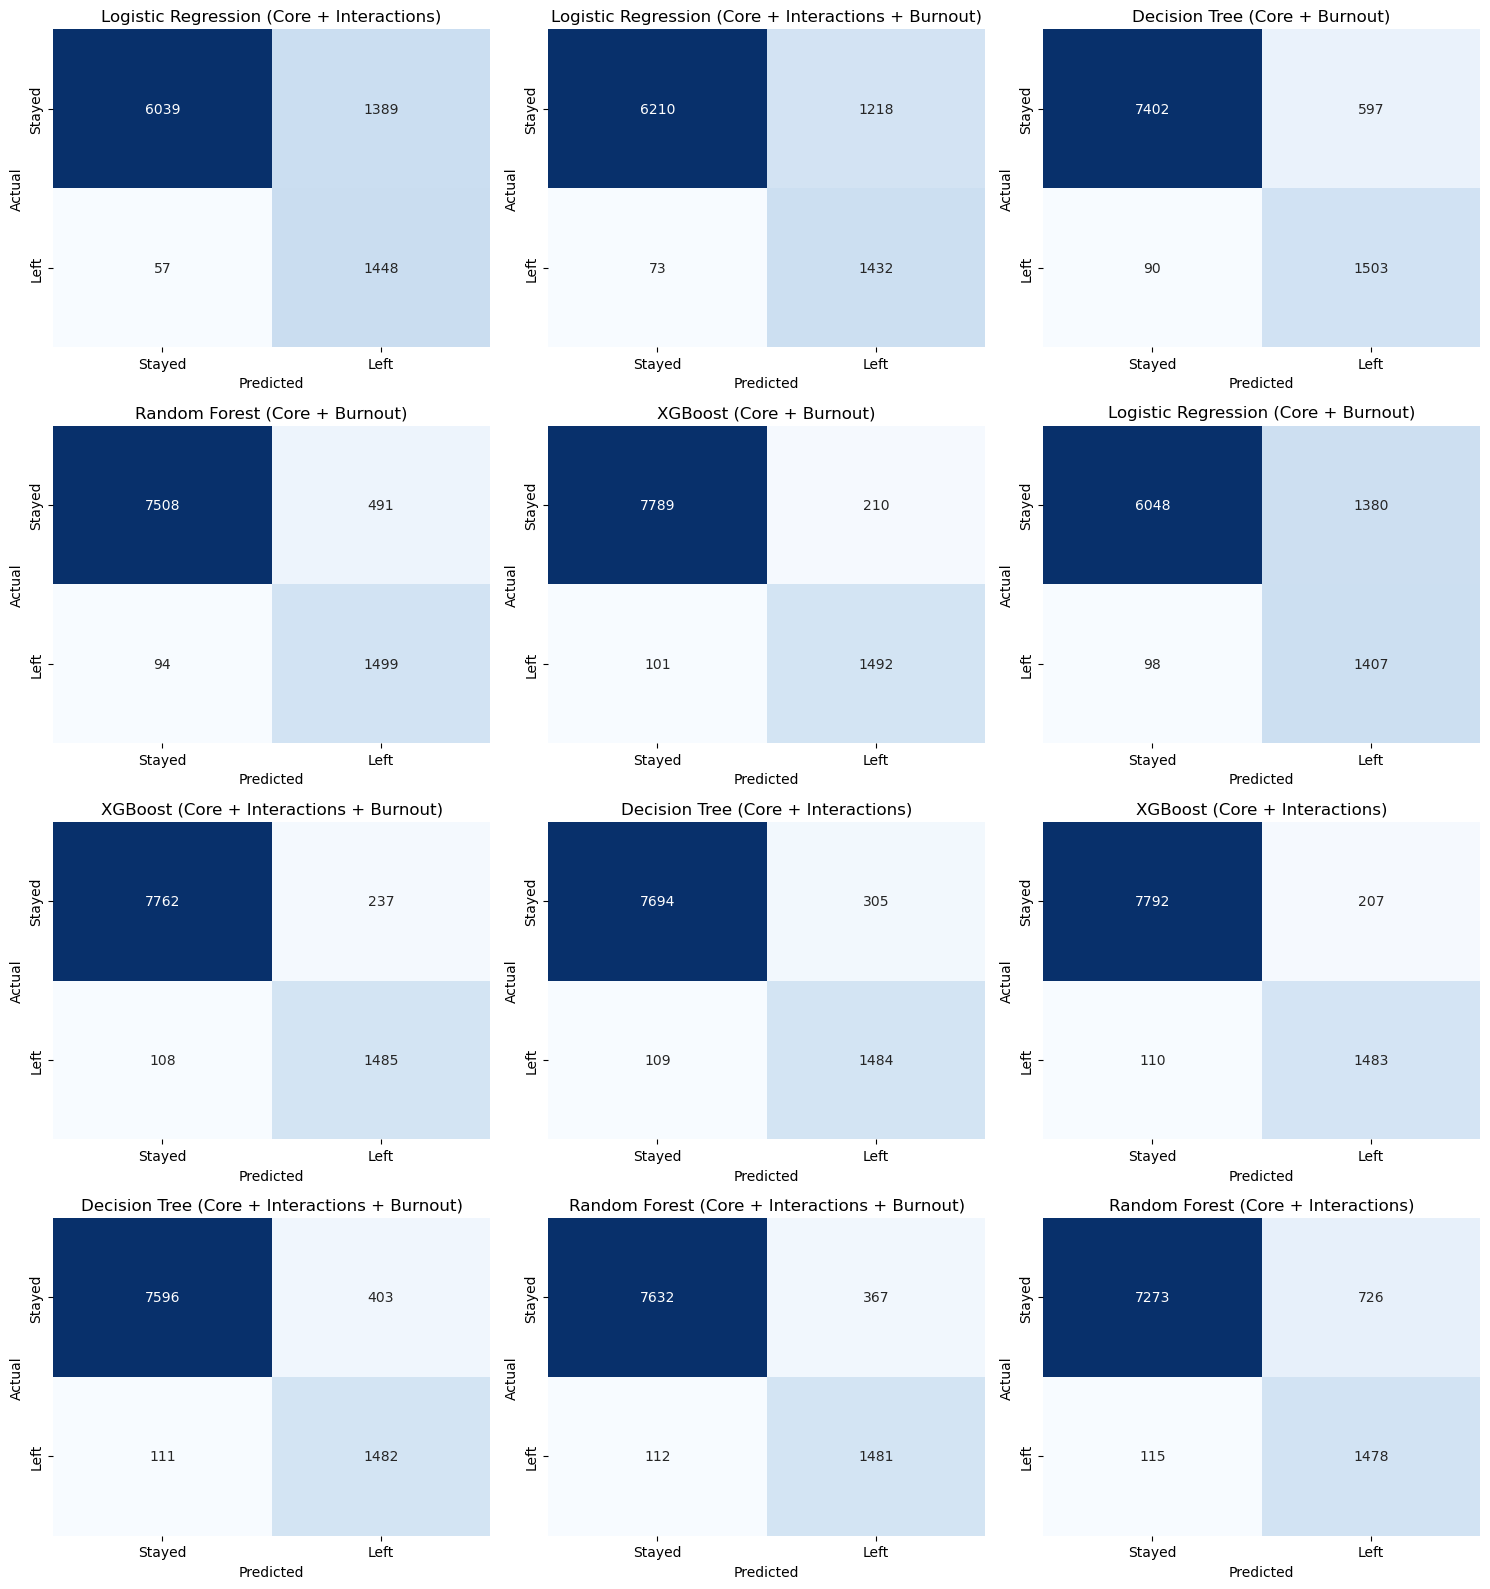

In [75]:
# plot confusion matrices for feature engineered round 2 models
plot_confusion_grid_from_results(results_fe2_df)
# plot_confusion_from_results(results_fe2_df)

<a id="model-evaluation-results"></a>

## **Model Evaluation Results**

[Back to top](#)

In [76]:
# merge all results dataframes into a single dataframe for comparison
all_results_df = pd.concat(
    [results_df, results_lr_fe_df, results_tree_fe_df, results_fe2_df],
    ignore_index=True,
)
all_results_df.sort_values(by="recall", ascending=False, inplace=True)
print("All Model Evaluation Results:")
all_results_df.head(10)

All Model Evaluation Results:


model    recall        f2  \
28          Logistic Regression (Core + Interactions)  0.962126  0.817433   
4   Logistic Regression with Interaction (feature ...  0.960133  0.819161   
29  Logistic Regression (Core + Interactions + Bur...  0.951495  0.825836   
0                          Logistic Regression (base)  0.947508  0.796203   
30                     Decision Tree (Core + Burnout)  0.943503  0.887040   
1                                Decision Tree (base)  0.942247  0.881179   
31                     Random Forest (Core + Burnout)  0.940992  0.896317   
2                                Random Forest (base)  0.940364  0.863799   
5   Logistic Regression with Binning (feature sele...  0.939535  0.855104   
6                    Logistic Regression with Binning  0.937542  0.854944   

          f1   roc_auc  precision  accuracy  features  \
28  0.666974  0.888335   0.510398  0.838128         6   
4   0.671312  0.891666   0.516071  0.841599        10   
29  0.689290  0.903177   0.540377  0.855480         6   
0   0.642342  0.891388   0.485860  0.822232        18   
30  0.813972  0.956257   0.715714  0.928378         7   
1   0.803103  0.945551   0.699767  0.923269        18   
31  0.836729  0.976981   0.753266  0.939012         7   
2   0.769784  0.964169   0.651588  0.906589        18   
5   0.753531  0.947481   0.629004  0.896451        14   
6   0.755151  0.952159   0.632168  0.897571        26   

                                          best_params  cv_best_score  \
28  {'model__C': 0.1, 'model__class_weight': 'bala...       0.962126   
4   {'model__C': 0.1, 'model__class_weight': 'bala...       0.960133   
29  {'model__C': 0.1, 'model__class_weight': 'bala...       0.951495   
0   {'model__C': 0.01, 'model__class_weight': 'bal...       0.947508   
30  {'model__class_weight': 'balanced', 'model__ma...       0.943495   
1   {'model__class_weight': 'balanced', 'model__ma...       0.942243   
31  {'model__n_estimators': 300, 'model__min_sampl...       0.940991   
2   {'model__n_estimators': 500, 'model__min_sampl...       0.940354   
5   {'model__C': 0.1, 'model__class_weight': 'bala...       0.939535   
6   {'model__C': 0.1, 'model__class_weight': 'bala...       0.937542   

                   conf_matrix  search_time  
28  [[6039, 1389], [57, 1448]]     0.801151  
4   [[6073, 1355], [60, 1445]]     2.056098  
29  [[6210, 1218], [73, 1432]]     0.982459  
0   [[5919, 1509], [79, 1426]]     5.170930  
30   [[7402, 597], [90, 1503]]     2.831705  
1    [[7355, 644], [92, 1501]]     2.358475  
31   [[7508, 491], [94, 1499]]    78.417716  
2    [[7198, 801], [95, 1498]]   178.203500  
5    [[6594, 834], [91, 1414]]     1.312480  
6    [[6607, 821], [94, 1411]]     3.109411

In [77]:
# save results to CSV
results_df.to_csv("../results/base_model_evaluation_results.csv", index=False)
results_lr_fe_df.to_csv(
    "../results/logistic_regression_feature_engineered_results.csv", index=False
)
results_tree_fe_df.to_csv(
    "../results/tree_based_feature_engineered_results.csv", index=False
)
results_fe2_df.to_csv("../results/feature_engineered_round_2_results.csv", index=False)
all_results_df.to_csv("../results/all_model_evaluation_results.csv", index=False)

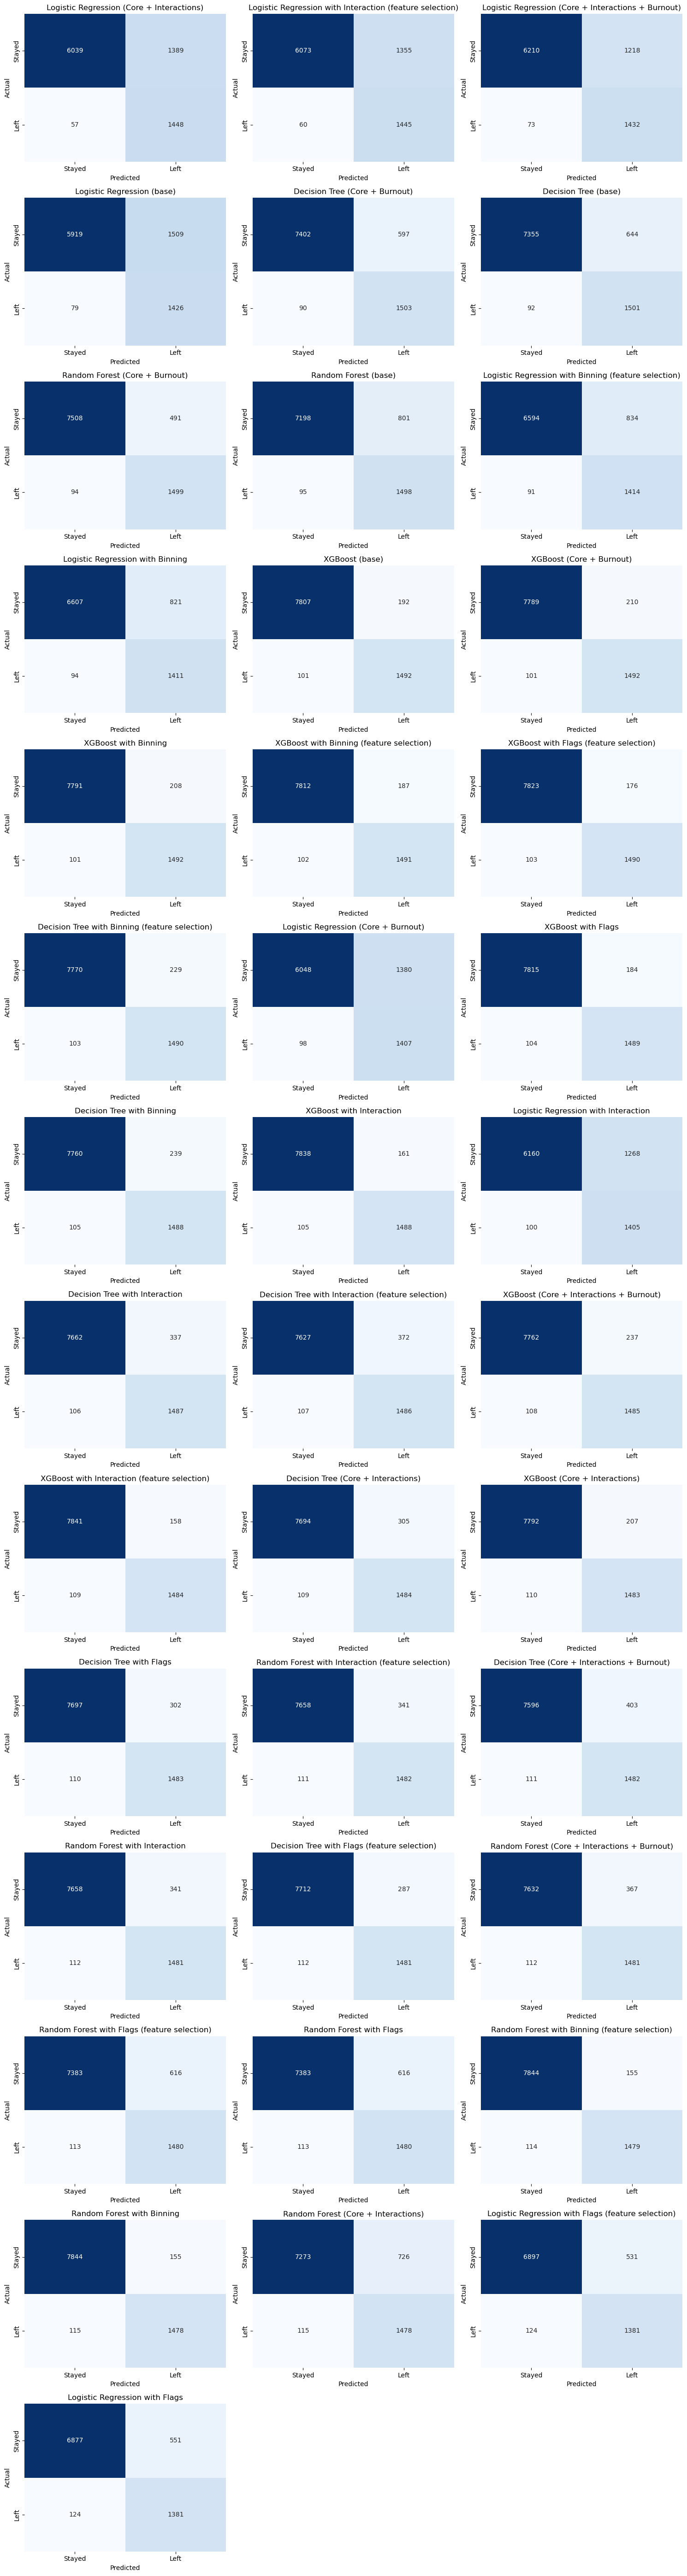

In [78]:
# plot confusion matrices for all models in a grid
plot_confusion_grid_from_results(all_results_df)

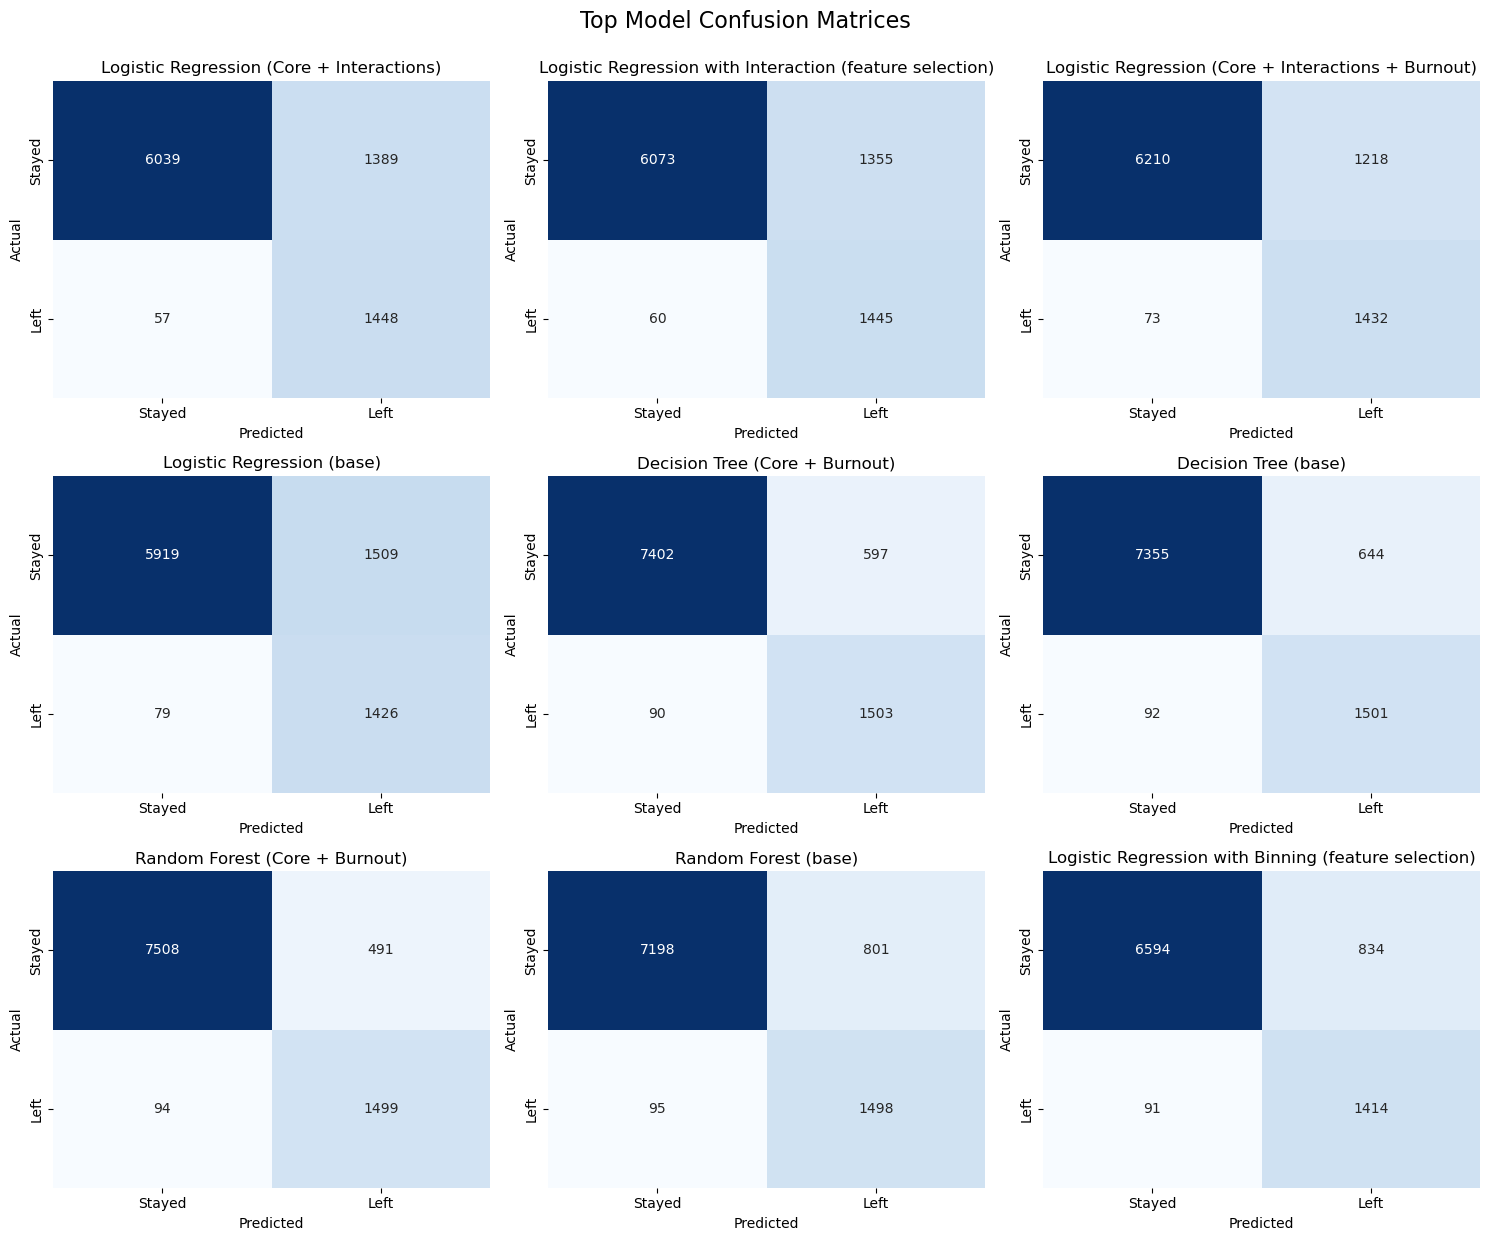

In [79]:
plot_confusion_grid_from_results(
    all_results_df.iloc[:9], 
    png_title="Top Model Confusion Matrices"
)

### Model Evaluation Summary

#### 1. **Logistic Regression**
- **Best Recall:**  
  - *Logistic Regression (Core + Interactions)* achieves the highest recall (0.962), with only 6 features and a simple, interpretable model.
  - Other logistic regression variants with feature selection or binning also maintain high recall (0.94–0.96) with fewer features.
- **F1 & Precision:**  
  - F1 scores for logistic regression are generally lower (0.64–0.75), reflecting lower precision (0.51–0.63).
  - Feature selection and engineering (e.g., interactions, binning) slightly improve F1 and precision while keeping models simple.

#### 2. **Tree-Based Models (Decision Tree, Random Forest, XGBoost)**
- **Top F1 & Precision:**  
  - XGBoost and Random Forest models consistently achieve the highest F1 (up to 0.91) and precision (up to 0.89), with strong recall (0.93–0.94).
  - Decision Trees also perform well, especially with feature engineering (F1 up to 0.89, precision up to 0.87).
- **Feature Efficiency:**  
  - Tree-based models with feature selection or engineered features (e.g., "Core + Burnout", "feature selection") often match or outperform base models with fewer features.

#### 3. **Feature Selection & Engineering**
- **Effectiveness:**  
  - Models using feature selection or engineered features (interactions, binning, flags) often achieve similar or better performance with fewer features.
  - This reduces model complexity and improves interpretability without sacrificing accuracy, recall, or F1.

#### 4. **Interpretability vs. Performance**
- **Trade-off:**  
  - Logistic regression models are more interpretable and, with feature engineering, are now much more competitive in recall and accuracy.
  - Tree-based models remain top performers for F1 and precision, but at the cost of increased complexity.

---

**Conclusion:**  
- Feature selection and engineering are highly effective, enabling simpler models (especially logistic regression) to achieve strong recall and competitive accuracy.
- Tree-based models (especially XGBoost) remain the best for F1 and precision, but logistic regression is now a viable, interpretable alternative for high-recall use cases.

In [80]:
# print all_results_df, ordered by alternate metrics
metrics = ["f1", "accuracy", "roc_auc", "precision"]

for metric in metrics:
    print(f"\n--- Sorted by {metric} (descending) ---")
    display(all_results_df.sort_values(by=metric, ascending=False).head())


--- Sorted by f1 (descending) ---


model    recall        f2  \
15                        XGBoost with Interaction  0.934087  0.927565   
19    XGBoost with Interaction (feature selection)  0.931576  0.925880   
26  Random Forest with Binning (feature selection)  0.928437  0.923682   
27                      Random Forest with Binning  0.927809  0.923173   
13          XGBoost with Flags (feature selection)  0.935342  0.926847   

          f1   roc_auc  precision  accuracy  features  \
15  0.917952  0.983251   0.902365  0.972269        22   
19  0.917465  0.983235   0.903776  0.972164        10   
26  0.916641  0.974975   0.905141  0.971956        14   
27  0.916305  0.974756   0.905083  0.971852        26   
13  0.914391  0.983656   0.894358  0.970913         9   

                                          best_params  cv_best_score  \
15  {'model__subsample': 0.8, 'model__scale_pos_we...       0.934077   
19  {'model__subsample': 1.0, 'model__scale_pos_we...       0.931569   
26  {'model__n_estimators': 300, 'model__min_sampl...       0.928432   
27  {'model__n_estimators': 300, 'model__min_sampl...       0.927805   
13  {'model__subsample': 1.0, 'model__scale_pos_we...       0.935334   

                   conf_matrix  search_time  
15  [[7838, 161], [105, 1488]]    24.394828  
19  [[7841, 158], [109, 1484]]    20.269477  
26  [[7844, 155], [114, 1479]]    85.079001  
27  [[7844, 155], [115, 1478]]    86.953273  
13  [[7823, 176], [103, 1490]]    16.068023


--- Sorted by accuracy (descending) ---


model    recall        f2  \
15                        XGBoost with Interaction  0.934087  0.927565   
19    XGBoost with Interaction (feature selection)  0.931576  0.925880   
26  Random Forest with Binning (feature selection)  0.928437  0.923682   
27                      Random Forest with Binning  0.927809  0.923173   
13          XGBoost with Flags (feature selection)  0.935342  0.926847   

          f1   roc_auc  precision  accuracy  features  \
15  0.917952  0.983251   0.902365  0.972269        22   
19  0.917465  0.983235   0.903776  0.972164        10   
26  0.916641  0.974975   0.905141  0.971956        14   
27  0.916305  0.974756   0.905083  0.971852        26   
13  0.914391  0.983656   0.894358  0.970913         9   

                                          best_params  cv_best_score  \
15  {'model__subsample': 0.8, 'model__scale_pos_we...       0.934077   
19  {'model__subsample': 1.0, 'model__scale_pos_we...       0.931569   
26  {'model__n_estimators': 300, 'model__min_sampl...       0.928432   
27  {'model__n_estimators': 300, 'model__min_sampl...       0.927805   
13  {'model__subsample': 1.0, 'model__scale_pos_we...       0.935334   

                   conf_matrix  search_time  
15  [[7838, 161], [105, 1488]]    24.394828  
19  [[7841, 158], [109, 1484]]    20.269477  
26  [[7844, 155], [114, 1479]]    85.079001  
27  [[7844, 155], [115, 1478]]    86.953273  
13  [[7823, 176], [103, 1490]]    16.068023


--- Sorted by roc_auc (descending) ---


model    recall        f2        f1  \
3                             XGBoost (base)  0.936598  0.926018  0.910589   
14                        XGBoost with Flags  0.934714  0.925420  0.911819   
10                      XGBoost with Binning  0.936598  0.924182  0.906165   
11  XGBoost with Binning (feature selection)  0.935970  0.926087  0.911648   
32                  XGBoost (Core + Burnout)  0.936598  0.923953  0.905615   

     roc_auc  precision  accuracy  features  \
3   0.986294   0.885986  0.969454        18   
14  0.985902   0.890018  0.969975        21   
10  0.985069   0.877647  0.967786        26   
11  0.984534   0.888558  0.969871        14   
32  0.983741   0.876616  0.967577         7   

                                          best_params  cv_best_score  \
3   {'model__subsample': 1.0, 'model__scale_pos_we...       0.936592   
14  {'model__subsample': 1.0, 'model__scale_pos_we...       0.934709   
10  {'model__subsample': 1.0, 'model__scale_pos_we...       0.936594   
11  {'model__subsample': 1.0, 'model__scale_pos_we...       0.935965   
32  {'model__subsample': 1.0, 'model__scale_pos_we...       0.936592   

                   conf_matrix  search_time  
3   [[7807, 192], [101, 1492]]    18.722251  
14  [[7815, 184], [104, 1489]]    23.907882  
10  [[7791, 208], [101, 1492]]    25.402422  
11  [[7812, 187], [102, 1491]]    19.591144  
32  [[7789, 210], [101, 1492]]    16.961480


--- Sorted by precision (descending) ---


model    recall        f2  \
26  Random Forest with Binning (feature selection)  0.928437  0.923682   
27                      Random Forest with Binning  0.927809  0.923173   
19    XGBoost with Interaction (feature selection)  0.931576  0.925880   
15                        XGBoost with Interaction  0.934087  0.927565   
13          XGBoost with Flags (feature selection)  0.935342  0.926847   

          f1   roc_auc  precision  accuracy  features  \
26  0.916641  0.974975   0.905141  0.971956        14   
27  0.916305  0.974756   0.905083  0.971852        26   
19  0.917465  0.983235   0.903776  0.972164        10   
15  0.917952  0.983251   0.902365  0.972269        22   
13  0.914391  0.983656   0.894358  0.970913         9   

                                          best_params  cv_best_score  \
26  {'model__n_estimators': 300, 'model__min_sampl...       0.928432   
27  {'model__n_estimators': 300, 'model__min_sampl...       0.927805   
19  {'model__subsample': 1.0, 'model__scale_pos_we...       0.931569   
15  {'model__subsample': 0.8, 'model__scale_pos_we...       0.934077   
13  {'model__subsample': 1.0, 'model__scale_pos_we...       0.935334   

                   conf_matrix  search_time  
26  [[7844, 155], [114, 1479]]    85.079001  
27  [[7844, 155], [115, 1478]]    86.953273  
19  [[7841, 158], [109, 1484]]    20.269477  
15  [[7838, 161], [105, 1488]]    24.394828  
13  [[7823, 176], [103, 1490]]    16.068023

In [81]:
# print total execution time, for measuring performance
nb_end_time = time.time()
print(f"Total execution time: {nb_end_time - nb_start_time:.2f} seconds")
print(
    f"Total execution time: {time.strftime('%H:%M:%S', time.gmtime(nb_end_time - nb_start_time))}"
)

Total execution time: 1649.42 seconds
Total execution time: 00:27:29


<a id="pace-execute-stage"></a>

# pacE: Execute Stage
[Back to top](#)
- Interpret model performance and results
- Share actionable steps with stakeholders



> I passed the point of diminishing returns long ago.
>
> But, I learned a lot of foundational stuff about the model construction process (Pipelines, cross-validation, random search vs. grid serach, checking misclassification errors, feature selection and engineering, etc), and i did get the logistic regression model a bit better, so I'll call it a win. The time may have been wasted now, but I'll be a lot quicker next time. Nothing like mastering the basics.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> ### Execute Stage Reflection
> 
> #### What key insights emerged from your model(s)?
> - **Satisfaction level** and **workload** (number of projects, monthly hours) are the strongest predictors of attrition.
> - Two main at-risk groups: **overworked/burned-out employees** (many projects, long hours, low satisfaction) and **underworked/disengaged employees** (few projects, low satisfaction).
> - **Tenure** is important: attrition peaks at 4–5 years, then drops sharply.
> - **Salary, department, and recent promotions** have minimal predictive value.
> - **Tree-based models (Random Forest, XGBoost)** achieved the best balance of recall, precision, and F1. With feature engineering, **logistic regression** became competitive and highly interpretable.
> 
> #### What business recommendations do you propose based on the models built?
> - **Monitor satisfaction and workload:** Regularly survey employees and track workload to identify those at risk of burnout or disengagement.
> - **Targeted retention efforts:** Focus on employees with low satisfaction and extreme workloads, especially those at the 4–5 year tenure mark.
> - **Promotions and recognition:** Consider more frequent recognition or advancement opportunities.
> - **Work-life balance:** Encourage reasonable project loads and monthly hours to reduce burnout risk.
> 
> #### What potential recommendations would you make to your manager/company?
> - **Implement early warning systems** using the model to flag at-risk employees for supportive HR outreach.
> - **Review workload distribution** and ensure fair, manageable assignments.
> - **Conduct stay interviews** with employees approaching 4–5 years of tenure.
> - **Communicate transparently** about how predictive models are used, emphasizing support rather than punitive action.
> 
> #### Do you think your model could be improved? Why or why not? How?
> - **Feature engineering:** Further refine interaction terms or add time-based features if available.
> - **External data:** Incorporate additional data (e.g., engagement surveys, manager ratings, exit interview themes).
> - **Model calibration:** Regularly retrain and calibrate the model as new data becomes available.
> - **Bias audits:** Routinely check for bias across demographic groups.
> 
> #### Given what you know about the data and the models you were using, what other questions could you address for the team?
> - What are the specific reasons for attrition in different departments or roles?
> - Are there seasonal or cyclical patterns in attrition?
> - How do external factors (e.g., economic conditions, industry trends) affect turnover?
> - What interventions are most effective for retaining at-risk employees?
> 
> #### What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
> - [pandas documentation](https://pandas.pydata.org/docs/)
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)
> - [seaborn documentation](https://seaborn.pydata.org/)
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)
> - [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/)
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
> 
> #### Do you have any ethical considerations in this stage?
> - **Data privacy:** Ensure employee data is kept confidential and secure.
> - **Fairness:** Avoid using the model to unfairly target or penalize specific groups.
> - **Transparency:** Clearly communicate how predictions are generated and used.
> - **Supportive use:** Use predictions to offer support and resources, not for punitive measures.
> - **Ongoing monitoring:** Regularly audit the model for bias and unintended consequences.

<a id="results-and-evaluation"></a>

## Results and Evaluation
[Back to top](#)
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

> Will do, after running X_test through model

### Conclusion, Recommendations, Next Steps

> ### Conclusion
> - **Satisfaction level** and **workload** (number of projects, monthly hours) are the strongest predictors of employee attrition.
> - Two main at-risk groups emerged: **overworked/burned-out employees** (many projects, long hours, low satisfaction) and **underworked/disengaged employees** (few projects, low satisfaction).
> - **Tenure** is important: attrition peaks at 4–5 years, then drops sharply.
> - **Salary, department, and recent promotions** have minimal predictive value.
> - **Tree-based models (Random Forest, XGBoost)** achieved the best balance of recall, precision, and F1. With feature engineering, **logistic regression** became competitive and highly interpretable.
> 
> ### Recommendations
> - **Monitor satisfaction and workload:** Regularly survey employees and track workload to identify those at risk of burnout or disengagement.
> - **Targeted retention efforts:** Focus on employees with low satisfaction and extreme workloads, especially those at the 4–5 year tenure mark.
> - **Promotions and recognition:** Consider more frequent recognition or advancement opportunities.
> - **Work-life balance:** Encourage reasonable project loads and monthly hours to reduce burnout risk.
> - **Implement early warning systems:** Use the model to flag at-risk employees for supportive HR outreach.
> - **Review workload distribution:** Ensure fair, manageable assignments.
> - **Conduct stay interviews:** Engage employees approaching 4–5 years of tenure.
> - **Communicate transparently:** Clearly explain how predictive models are used, emphasizing support rather than punitive action.
> 
> ### Next Steps
> - **Model deployment:** Integrate the predictive model into HR processes for early identification of at-risk employees.
> - **Continuous improvement:** Regularly retrain and calibrate the model as new data becomes available.
> - **Expand data sources:** Incorporate additional data (e.g., engagement surveys, manager ratings, exit interview themes) to improve model accuracy.
> - **Bias and fairness audits:** Routinely check for bias across demographic groups and monitor for unintended consequences.
> - **Ethical safeguards:** Ensure employee data privacy, fairness, and transparency in all predictive analytics initiatives.
> 
> ---
> **Resources Used:**
> - [pandas documentation](https://pandas.pydata.org/docs/)
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)
> - [seaborn documentation](https://seaborn.pydata.org/)
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)
> - [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/)
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.



<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/js/bootstrap.bundle.min.js"></script>
<script src="../static/js/scripts.js"></script>

